In [4]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(rstatix)
library(parallel)
library(ggpubr)
library(ComplexHeatmap)
library(compositions)
library(ggsci)
library(math)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



Attaching package: ‘purrr’


The following object is masked from ‘package:plyr’:

    compact


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4


Attaching package: ‘rstatix’


The following objects are masked from ‘package:plyr’:

    desc, mutate


The following object is masked from ‘package:stats’:

    filter


Loading required package: ggplot2


Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    muta

ERROR: Error in library(compositions): there is no package called ‘compositions’


In [1]:
colors = c('#FDC086','#FFFF99','#F0027F','#BF5B17','#666666',
          '#1B9E77','#D95F02','#7570B3','#E7298A','#66A61E','#E6AB02','#A6761D','#666666',
          '#A6CEE3','#1F78B4','#B2DF8A','#33A02C','#FB9A99','#E31A1C','#FDBF6F','#FF7F00',
          '#CAB2D6','#6A3D9A','#FFFF99','#B15928','#FBB4AE','#B3CDE3','#CCEBC5','#DECBE4',
          '#FED9A6','#FFFFCC','#E5D8BD','#FDDAEC','#F2F2F2','#B3E2CD','#FDCDAC','#CBD5E8',
          '#F4CAE4','#E6F5C9','#FFF2AE','#F1E2CC','#CCCCCC','#E41A1C','#377EB8','#4DAF4A',
          '#984EA3','#FF7F00','#FFFF33','#A65628','#F781BF','#999999','#66C2A5','#FC8D62',
          '#8DA0CB','#E78AC3','#A6D854','#FFD92F','#E5C494','#B3B3B3','#8DD3C7','#FFFFB3',
          '#BEBADA','#FB8072','#80B1D3','#FDB462','#B3DE69','#FCCDE5','#D9D9D9','#BC80BD',
          '#CCEBC5','#FFED6F')

# Reading the file

In [2]:
# Read the CSV file into a data frame
myeloid_df <- read.csv('/home/jupyter/Myeloid_cells/files/Parquet_files/AIFI_Reference_processed.csv')


In [19]:
#remove UPI from the cohort
myeloid_df <- myeloid_df %>% filter(cohort.cohortGuid != 'UP1')

In [20]:
head(myeloid_df)

,barcodes,barcodes.1,batch_id,cell_name,cell_uuid,chip_id,hto_barcode,hto_category,n_genes,n_mito_umis,⋯,pct_counts_mito,leiden,leiden_resolution_1,leiden_resolution_1.5,leiden_resolution_2,AIFI_L1,AIFI_L2,AIFI_L3,AIFI_L3.5,cluster_dummy
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
cf71f47048b611ea8957bafe6d70929e,cf71f47048b611ea8957bafe6d70929e,cf71f47048b611ea8957bafe6d70929e,B001,weathered_pernicious_polliwog,cf71f47048b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1081,115,⋯,4.032258,10,9,11,10,T cell,MAIT,CD8 MAIT,CD8 MAIT,False
cf71fb7848b611ea8957bafe6d70929e,cf71fb7848b611ea8957bafe6d70929e,cf71fb7848b611ea8957bafe6d70929e,B001,long_weakminded_roebuck,cf71fb7848b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1118,77,⋯,2.071006,2,7,4,3,T cell,Memory CD4 T cell,CM CD4 T cell,CM CD4 T cell,False
cf7216a848b611ea8957bafe6d70929e,cf7216a848b611ea8957bafe6d70929e,cf7216a848b611ea8957bafe6d70929e,B001,bimetallic_returnable_pony,cf7216a848b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1836,249,⋯,4.098091,2,6,8,6,T cell,Memory CD4 T cell,GZMB- CD27+ EM CD4 T cell,GZMB- CD27+ EM CD4 T cell,False
cf72178448b611ea8957bafe6d70929e,cf72178448b611ea8957bafe6d70929e,cf72178448b611ea8957bafe6d70929e,B001,newsworthy_copacetic_halicore,cf72178448b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,928,60,⋯,2.130682,1,0,1,0,T cell,Naive CD4 T cell,Core naive CD4 T cell,Core naive CD4 T cell,False
cf721a4048b611ea8957bafe6d70929e,cf721a4048b611ea8957bafe6d70929e,cf721a4048b611ea8957bafe6d70929e,B001,esthetical_diffident_mosasaur,cf721a4048b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,2832,219,⋯,2.766199,25,16,21,26,NK cell,Proliferating NK cell,Proliferating NK cell,Proliferating NK cell,False
cf7224c248b611ea8957bafe6d70929e,cf7224c248b611ea8957bafe6d70929e,cf7224c248b611ea8957bafe6d70929e,B001,chic_mahogany_caribou,cf7224c248b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,951,122,⋯,5.640314,7,2,6,4,T cell,Naive CD8 T cell,Core naive CD8 T cell,Core naive CD8 T cell,False


In [21]:
colnames(myeloid_df)

[1] "barcodes"                              
 [2] "barcodes.1"                            
 [3] "batch_id"                              
 [4] "cell_name"                             
 [5] "cell_uuid"                             
 [6] "chip_id"                               
 [7] "hto_barcode"                           
 [8] "hto_category"                          
 [9] "n_genes"                               
[10] "n_mito_umis"                           
[11] "n_reads"                               
[12] "n_umis"                                
[13] "original_barcodes"                     
[14] "pbmc_sample_id"                        
[15] "pool_id"                               
[16] "seurat_pbmc_type"                      
[17] "seurat_pbmc_type_score"                
[18] "umap_1"                                
[19] "umap_2"                                
[20] "well_id"                               
[21] "subject.biologicalSex"                 
[22] "subject.ethnicity"                     
[23] "subject.partnerCode"                   
[24] "subject.race"                          
[25] "subject.subjectGuid"                   
[26] "cohort.cohortGuid"                     
[27] "sample.visitName"                      
[28] "sample.visitDetails"                   
[29] "subject.birthYear"                     
[30] "CMV.IgG.Serology.Result.Interpretation"
[31] "BMI"                                   
[32] "predicted.celltype.l1.score"           
[33] "predicted.celltype.l1"                 
[34] "predicted.celltype.l2.score"           
[35] "predicted.celltype.l2"                 
[36] "predicted.celltype.l3.score"           
[37] "predicted.celltype.l3"                 
[38] "predicted.celltype.l2.5.score"         
[39] "predicted.celltype.l2.5"               
[40] "predicted_labels_celltypist"           
[41] "majority_voting_celltypist"            
[42] "predicted_doublet"                     
[43] "doublet_score"                         
[44] "n_genes_by_counts"                     
[45] "log1p_n_genes_by_counts"               
[46] "total_counts"                          
[47] "log1p_total_counts"                    
[48] "pct_counts_in_top_50_genes"            
[49] "pct_counts_in_top_100_genes"           
[50] "pct_counts_in_top_200_genes"           
[51] "pct_counts_in_top_500_genes"           
[52] "total_counts_mito"                     
[53] "log1p_total_counts_mito"               
[54] "pct_counts_mito"                       
[55] "leiden"                                
[56] "leiden_resolution_1"                   
[57] "leiden_resolution_1.5"                 
[58] "leiden_resolution_2"                   
[59] "AIFI_L1"                               
[60] "AIFI_L2"                               
[61] "AIFI_L3"                               
[62] "AIFI_L3.5"                             
[63] "cluster_dummy"

In [22]:
rownames(myeloid_df)<-myeloid_df$cell_uuid

In [23]:
## testing label organization
# Read the CSV file containing the desired labels
label_data <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/Frequency_Plot/Immune_Cell_Order_forDEGsummary - Sheet1.csv", header = TRUE)

# Extract the labels from the CSV file
desired_labels <- label_data$FINAL.ORDER



# CLR Transform


In [24]:
clr_transform <- function(x) {
  if (length(x) == 0) {
    return(NA)  # return NA for empty vectors
  }
  geom_mean <- exp(mean(log(x)))
  return(log(x / geom_mean))
}

# Comparsion within total PBMCs (Percentage - mean difference)

In [25]:
## Percentage of total

result <- myeloid_df %>%
  dplyr::group_by(AIFI_L3, subject.subjectGuid ) %>%               
  dplyr::summarise(count = n()) %>%                  # Count occurrences
  dplyr::group_by(subject.subjectGuid) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(subject.subjectGuid) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% # Group again by subjectGuid for CLR# Calculate percentage
  dplyr::ungroup()

head(result)
#sum(result$subject.subjectGuid)

`summarise()` has grouped output by 'AIFI_L3'. You can override using the
`.groups` argument.


AIFI_L3,subject.subjectGuid,count,percentage,percentage_clr
<chr>,<chr>,<int>,<dbl>,<dbl>
ASDC,BR1001,6,0.03236770,-2.232976
ASDC,BR1002,5,0.02637409,-2.242500
ASDC,BR1003,4,0.02094680,-2.763896
ASDC,BR1004,3,0.01710571,-2.626914
ASDC,BR1005,5,0.02809620,-1.943233
ASDC,BR1006,4,0.02300966,-2.337902


In [26]:
result %>% filter(subject.subjectGuid == "BR1001") %>% 
      select(percentage) %>%
      pull() %>% 
      sum()

[1] 100

In [27]:
result<-left_join(result,unique(myeloid_df[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex','CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))

In [28]:
result$AIFI_L3 <- gsub("Core naive CD8 T cell ", "Core naive CD8 T cell", result$AIFI_L3 )

In [29]:
head(result)
unique(result$AIFI_L3)

AIFI_L3,subject.subjectGuid,count,percentage,percentage_clr,cohort.cohortGuid,subject.biologicalSex,CMV.IgG.Serology.Result.Interpretation
<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASDC,BR1001,6,0.03236770,-2.232976,BR1,Female,Negative
ASDC,BR1002,5,0.02637409,-2.242500,BR1,Male,Negative
ASDC,BR1003,4,0.02094680,-2.763896,BR1,Female,Negative
ASDC,BR1004,3,0.01710571,-2.626914,BR1,Male,Negative
ASDC,BR1005,5,0.02809620,-1.943233,BR1,Female,Negative
ASDC,BR1006,4,0.02300966,-2.337902,BR1,Male,Negative


[1] "ASDC"                                
 [2] "Activated memory B cell"             
 [3] "Adaptive NK cell"                    
 [4] "BaEoMaP cell"                        
 [5] "C1Q+ CD16 monocyte"                  
 [6] "CD14+ cDC2"                          
 [7] "CD27+ effector B cell"               
 [8] "CD27- effector B cell"               
 [9] "CD4 MAIT"                            
[10] "CD56bright NK cell"                  
[11] "CD8 MAIT"                            
[12] "CD8aa"                               
[13] "CD95 memory B cell"                  
[14] "CLP cell"                            
[15] "CM CD4 T cell"                       
[16] "CM CD8 T cell"                       
[17] "CMP cell"                            
[18] "Core CD14 monocyte"                  
[19] "Core CD16 monocyte"                  
[20] "Core memory B cell"                  
[21] "Core naive B cell"                   
[22] "Core naive CD4 T cell"               
[23] "Core naive CD8 T cell"               
[24] "DN T cell"                           
[25] "Early memory B cell"                 
[26] "Erythrocyte"                         
[27] "GZMB+ Vd2 gdT"                       
[28] "GZMB- CD27+ EM CD4 T cell"           
[29] "GZMB- CD27- EM CD4 T cell"           
[30] "GZMK+ CD27+ EM CD8 T cell"           
[31] "GZMK+ CD56dim NK cell"               
[32] "GZMK+ Vd2 gdT"                       
[33] "GZMK+ memory CD4 Treg"               
[34] "GZMK- CD27+ EM CD8 T cell"           
[35] "GZMK- CD56dim NK cell"               
[36] "HLA-DRhi cDC2"                       
[37] "IL1B+ CD14 monocyte"                 
[38] "ILC"                                 
[39] "ISG+ CD14 monocyte"                  
[40] "ISG+ CD16 monocyte"                  
[41] "ISG+ CD56dim NK cell"                
[42] "ISG+ MAIT"                           
[43] "ISG+ cDC2"                           
[44] "ISG+ memory CD4 T cell"              
[45] "ISG+ memory CD8 T cell"              
[46] "ISG+ naive B cell"                   
[47] "ISG+ naive CD4 T cell"               
[48] "ISG+ naive CD8 T cell"               
[49] "Intermediate monocyte"               
[50] "KLRB1+ memory CD4 Treg"              
[51] "KLRB1+ memory CD8 Treg"              
[52] "KLRF1+ GZMB+ CD27- EM CD8 T cell"    
[53] "KLRF1+ effector Vd1 gdT"             
[54] "KLRF1- GZMB+ CD27- EM CD8 T cell"    
[55] "KLRF1- GZMB+ CD27- memory CD4 T cell"
[56] "KLRF1- effector Vd1 gdT"             
[57] "Memory CD4 Treg"                     
[58] "Memory CD8 Treg"                     
[59] "Naive CD4 Treg"                      
[60] "Naive Vd1 gdT"                       
[61] "Plasma cell"                         
[62] "Platelet"                            
[63] "Proliferating NK cell"               
[64] "Proliferating T cell"                
[65] "SOX4+ Vd1 gdT"                       
[66] "SOX4+ naive CD4 T cell"              
[67] "SOX4+ naive CD8 T cell"              
[68] "Transitional B cell"                 
[69] "Type 2 polarized memory B cell"      
[70] "cDC1"                                
[71] "pDC"

In [ ]:
# library(dplyr)

# # Assuming your data frame is named 'your_data'
# result_df <- result %>%
#   dplyr::group_by(AIFI_L3, cohort.cohortGuid, CMV.IgG.Serology.Result.Interpretation) %>%
#   dplyr::summarise(mean_percentage = mean(percentage)) %>%
#   tidyr::pivot_wider(names_from = CMV.IgG.Serology.Result.Interpretation, values_from = mean_percentage) %>%
#   dplyr::mutate(Mean_Diff_BR1 = Positive - Negative,
#          Mean_Diff_BR2 = Positive - Negative) %>%
#   dplyr::select(AIFI_L3, cohort.cohortGuid, Mean_Diff_BR1, Mean_Diff_BR2)

# # Print the result
# print(result_df)


In [ ]:
#BY Age seperation

# library(dplyr)
# library(tidyr)

# # Assuming your data frame is named 'your_data'
# result_df <- result %>%
#   dplyr::group_by(AIFI_L3, CMV.IgG.Serology.Result.Interpretation, cohort.cohortGuid) %>%
#   dplyr::summarise(mean_percentage = mean(percentage)) 

# # Print the result
# print(result_df)

## Age Comparison

### Mean

In [ ]:
#continuous code
result_df <- result %>%
  dplyr::group_by(AIFI_L3, cohort.cohortGuid) %>%
  dplyr::summarise(mean_percentage = mean(percentage)) 

result_df <- result_df %>% spread(cohort.cohortGuid, mean_percentage)

result_df <- result_df %>%  
        mutate(Mean_Diff = (BR1 - BR2)) %>%
        mutate(log2FC = log2(BR1/BR2))

stat_test<- result %>%
  select(percentage,percentage_clr, AIFI_L3, cohort.cohortGuid) %>%
  unique(.) %>%
  group_by(AIFI_L3) %>%
  wilcox_test(percentage_clr ~ cohort.cohortGuid) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()

merged_df <- merge(result_df, stat_test, by = "AIFI_L3")

merged_df <- merged_df %>% mutate(minus_log10_p_adj = -log(p.adj),
                                  sign_log2FC = sign(log2FC),
                                 product_column = (minus_log10_p_adj * sign_log2FC))



In [ ]:
#Mean_Plot - Age
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_mean_diff <- ifelse(result_df$Mean_Diff >= 0, "High_in_BR1", "High_in_BR2")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = reorder(AIFI_L3, desc(-Mean_Diff)), y = Mean_Diff, fill = color_mean_diff)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of Mean_Diff - Age comparison",
       x = "AIFI_L3",
       y = "Mean_Diff") +
  scale_fill_manual(values = c("High_in_BR1" = "blue", "High_in_BR2" = "red"),
                    breaks = c("High_in_BR1", "High_in_BR2"),
                    labels = c("High_in_BR1", "High_in_BR2")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15),
                axis.title.x = element_text(size = 14),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 14))


# Add p-values to the plot using geom_text
p + geom_text(aes(label = p.adj.signif), 
              vjust = ifelse(merged_df$Mean_Diff >= 0, 0, 1.5), 
              size = 4)


In [ ]:
#log2FC(mean diff) - Age
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_mean_log2FC <- ifelse(result_df$log2FC >= 0, "High_in_BR1", "High_in_BR2")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = reorder(AIFI_L3, desc(-log2FC)), y = log2FC, fill = color_mean_log2FC)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of log2FC(Mean_Diff) - Age comparison",
       x = "AIFI_L3",
       y = "log2FC(Mean_Diff)") +
  scale_fill_manual(values = c("High_in_BR1" = "blue", "High_in_BR2" = "red"),
                    breaks = c("High_in_BR1", "High_in_BR2"),
                    labels = c("High_in_BR1", "High_in_BR2")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15),
                axis.title.x = element_text(size = 14),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 14))


# Add p-values to the plot using geom_text
p + geom_text(aes(label = p.adj.signif), 
              vjust = ifelse(merged_df$log2FC >= 0, 0, 1.5), 
              size = 4)


### Median

In [30]:
#continuous code
#
result_df <- result %>%
  dplyr::group_by(AIFI_L3, cohort.cohortGuid) %>%
  dplyr::summarise(median_percentage = median(percentage)) 


result_df <- result_df %>% spread(cohort.cohortGuid, median_percentage)


result_df <- result_df %>%  
        mutate(Median_Diff = (BR2 - BR1)) %>%
        mutate(log2FC = log2(BR2/BR1))


stat_test<- result %>%
  select(percentage,percentage_clr, AIFI_L3, cohort.cohortGuid) %>%
  unique(.) %>%
  group_by(AIFI_L3) %>%
  wilcox_test(percentage_clr ~ cohort.cohortGuid) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()



merged_df <- left_join(result_df, stat_test, by = "AIFI_L3")

merged_df <- merged_df %>% mutate(minus_log10_p_adj = -log(p.adj),
                                  sign_log2FC = sign(log2FC),
                                 product_column = (minus_log10_p_adj * sign_log2FC))

merged_df$AIFI_L3 <- factor(merged_df$AIFI_L3, levels = desired_labels)


`summarise()` has grouped output by 'AIFI_L3'. You can override using the
`.groups` argument.


In [32]:
write.csv(merged_df, "/home/jupyter/Myeloid_cells/files/Claire_freq_summary_Age_table.csv")

In [21]:
unique(result_df$AIFI_L3) 
unique(stat_test$AIFI_L3) #with fix
unique(merged_df$AIFI_L3) #with fix

[1] "Activated memory B cell"             
 [2] "Adaptive NK cell"                    
 [3] "ASDC"                                
 [4] "BaEoMaP cell"                        
 [5] "C1Q+ CD16 monocyte"                  
 [6] "CD14+ cDC2"                          
 [7] "CD27- effector B cell"               
 [8] "CD27+ effector B cell"               
 [9] "CD4 MAIT"                            
[10] "CD56bright NK cell"                  
[11] "CD8 MAIT"                            
[12] "CD8aa"                               
[13] "CD95 memory B cell"                  
[14] "cDC1"                                
[15] "CLP cell"                            
[16] "CM CD4 T cell"                       
[17] "CM CD8 T cell"                       
[18] "CMP cell"                            
[19] "Core CD14 monocyte"                  
[20] "Core CD16 monocyte"                  
[21] "Core memory B cell"                  
[22] "Core naive B cell"                   
[23] "Core naive CD4 T cell"               
[24] "Core naive CD8 T cell"               
[25] "DN T cell"                           
[26] "Early memory B cell"                 
[27] "Erythrocyte"                         
[28] "GZMB- CD27- EM CD4 T cell"           
[29] "GZMB- CD27+ EM CD4 T cell"           
[30] "GZMB+ Vd2 gdT"                       
[31] "GZMK- CD27+ EM CD8 T cell"           
[32] "GZMK- CD56dim NK cell"               
[33] "GZMK+ CD27+ EM CD8 T cell"           
[34] "GZMK+ CD56dim NK cell"               
[35] "GZMK+ memory CD4 Treg"               
[36] "GZMK+ Vd2 gdT"                       
[37] "HLA-DRhi cDC2"                       
[38] "IL1B+ CD14 monocyte"                 
[39] "ILC"                                 
[40] "Intermediate monocyte"               
[41] "ISG+ CD14 monocyte"                  
[42] "ISG+ CD16 monocyte"                  
[43] "ISG+ CD56dim NK cell"                
[44] "ISG+ cDC2"                           
[45] "ISG+ MAIT"                           
[46] "ISG+ memory CD4 T cell"              
[47] "ISG+ memory CD8 T cell"              
[48] "ISG+ naive B cell"                   
[49] "ISG+ naive CD4 T cell"               
[50] "ISG+ naive CD8 T cell"               
[51] "KLRB1+ memory CD4 Treg"              
[52] "KLRB1+ memory CD8 Treg"              
[53] "KLRF1- effector Vd1 gdT"             
[54] "KLRF1- GZMB+ CD27- EM CD8 T cell"    
[55] "KLRF1- GZMB+ CD27- memory CD4 T cell"
[56] "KLRF1+ effector Vd1 gdT"             
[57] "KLRF1+ GZMB+ CD27- EM CD8 T cell"    
[58] "Memory CD4 Treg"                     
[59] "Memory CD8 Treg"                     
[60] "Naive CD4 Treg"                      
[61] "Naive Vd1 gdT"                       
[62] "pDC"                                 
[63] "Plasma cell"                         
[64] "Platelet"                            
[65] "Proliferating NK cell"               
[66] "Proliferating T cell"                
[67] "SOX4+ naive CD4 T cell"              
[68] "SOX4+ naive CD8 T cell"              
[69] "SOX4+ Vd1 gdT"                       
[70] "Transitional B cell"                 
[71] "Type 2 polarized memory B cell"

[1] "ASDC"                                
 [2] "Activated memory B cell"             
 [3] "Adaptive NK cell"                    
 [4] "BaEoMaP cell"                        
 [5] "C1Q+ CD16 monocyte"                  
 [6] "CD14+ cDC2"                          
 [7] "CD27+ effector B cell"               
 [8] "CD27- effector B cell"               
 [9] "CD4 MAIT"                            
[10] "CD56bright NK cell"                  
[11] "CD8 MAIT"                            
[12] "CD8aa"                               
[13] "CD95 memory B cell"                  
[14] "CLP cell"                            
[15] "CM CD4 T cell"                       
[16] "CM CD8 T cell"                       
[17] "CMP cell"                            
[18] "Core CD14 monocyte"                  
[19] "Core CD16 monocyte"                  
[20] "Core memory B cell"                  
[21] "Core naive B cell"                   
[22] "Core naive CD4 T cell"               
[23] "Core naive CD8 T cell"               
[24] "DN T cell"                           
[25] "Early memory B cell"                 
[26] "Erythrocyte"                         
[27] "GZMB+ Vd2 gdT"                       
[28] "GZMB- CD27+ EM CD4 T cell"           
[29] "GZMB- CD27- EM CD4 T cell"           
[30] "GZMK+ CD27+ EM CD8 T cell"           
[31] "GZMK+ CD56dim NK cell"               
[32] "GZMK+ Vd2 gdT"                       
[33] "GZMK+ memory CD4 Treg"               
[34] "GZMK- CD27+ EM CD8 T cell"           
[35] "GZMK- CD56dim NK cell"               
[36] "HLA-DRhi cDC2"                       
[37] "IL1B+ CD14 monocyte"                 
[38] "ILC"                                 
[39] "ISG+ CD14 monocyte"                  
[40] "ISG+ CD16 monocyte"                  
[41] "ISG+ CD56dim NK cell"                
[42] "ISG+ MAIT"                           
[43] "ISG+ cDC2"                           
[44] "ISG+ memory CD4 T cell"              
[45] "ISG+ memory CD8 T cell"              
[46] "ISG+ naive B cell"                   
[47] "ISG+ naive CD4 T cell"               
[48] "ISG+ naive CD8 T cell"               
[49] "Intermediate monocyte"               
[50] "KLRB1+ memory CD4 Treg"              
[51] "KLRB1+ memory CD8 Treg"              
[52] "KLRF1+ GZMB+ CD27- EM CD8 T cell"    
[53] "KLRF1+ effector Vd1 gdT"             
[54] "KLRF1- GZMB+ CD27- EM CD8 T cell"    
[55] "KLRF1- GZMB+ CD27- memory CD4 T cell"
[56] "KLRF1- effector Vd1 gdT"             
[57] "Memory CD4 Treg"                     
[58] "Memory CD8 Treg"                     
[59] "Naive CD4 Treg"                      
[60] "Naive Vd1 gdT"                       
[61] "Plasma cell"                         
[62] "Platelet"                            
[63] "Proliferating NK cell"               
[64] "Proliferating T cell"                
[65] "SOX4+ Vd1 gdT"                       
[66] "SOX4+ naive CD4 T cell"              
[67] "SOX4+ naive CD8 T cell"              
[68] "Transitional B cell"                 
[69] "Type 2 polarized memory B cell"      
[70] "cDC1"                                
[71] "pDC"

[1] Activated memory B cell              Adaptive NK cell                    
 [3] ASDC                                 BaEoMaP cell                        
 [5] C1Q+ CD16 monocyte                   CD14+ cDC2                          
 [7] CD27- effector B cell                CD27+ effector B cell               
 [9] CD4 MAIT                             CD56bright NK cell                  
[11] CD8 MAIT                             CD8aa                               
[13] CD95 memory B cell                   cDC1                                
[15] CLP cell                             CM CD4 T cell                       
[17] CM CD8 T cell                        CMP cell                            
[19] Core CD14 monocyte                   Core CD16 monocyte                  
[21] Core memory B cell                   Core naive B cell                   
[23] Core naive CD4 T cell                Core naive CD8 T cell               
[25] DN T cell                            Early memory B cell                 
[27] Erythrocyte                          GZMB- CD27- EM CD4 T cell           
[29] GZMB- CD27+ EM CD4 T cell            GZMB+ Vd2 gdT                       
[31] GZMK- CD27+ EM CD8 T cell            GZMK- CD56dim NK cell               
[33] GZMK+ CD27+ EM CD8 T cell            GZMK+ CD56dim NK cell               
[35] GZMK+ memory CD4 Treg                GZMK+ Vd2 gdT                       
[37] HLA-DRhi cDC2                        IL1B+ CD14 monocyte                 
[39] ILC                                  Intermediate monocyte               
[41] ISG+ CD14 monocyte                   ISG+ CD16 monocyte                  
[43] ISG+ CD56dim NK cell                 ISG+ cDC2                           
[45] ISG+ MAIT                            ISG+ memory CD4 T cell              
[47] ISG+ memory CD8 T cell               ISG+ naive B cell                   
[49] ISG+ naive CD4 T cell                ISG+ naive CD8 T cell               
[51] KLRB1+ memory CD4 Treg               KLRB1+ memory CD8 Treg              
[53] KLRF1- effector Vd1 gdT              KLRF1- GZMB+ CD27- EM CD8 T cell    
[55] KLRF1- GZMB+ CD27- memory CD4 T cell KLRF1+ effector Vd1 gdT             
[57] KLRF1+ GZMB+ CD27- EM CD8 T cell     Memory CD4 Treg                     
[59] Memory CD8 Treg                      Naive CD4 Treg                      
[61] Naive Vd1 gdT                        pDC                                 
[63] Plasma cell                          Platelet                            
[65] Proliferating NK cell                Proliferating T cell                
[67] SOX4+ naive CD4 T cell               SOX4+ naive CD8 T cell              
[69] SOX4+ Vd1 gdT                        Transitional B cell                 
[71] Type 2 polarized memory B cell      
71 Levels: SOX4+ naive CD4 T cell ... BaEoMaP cell

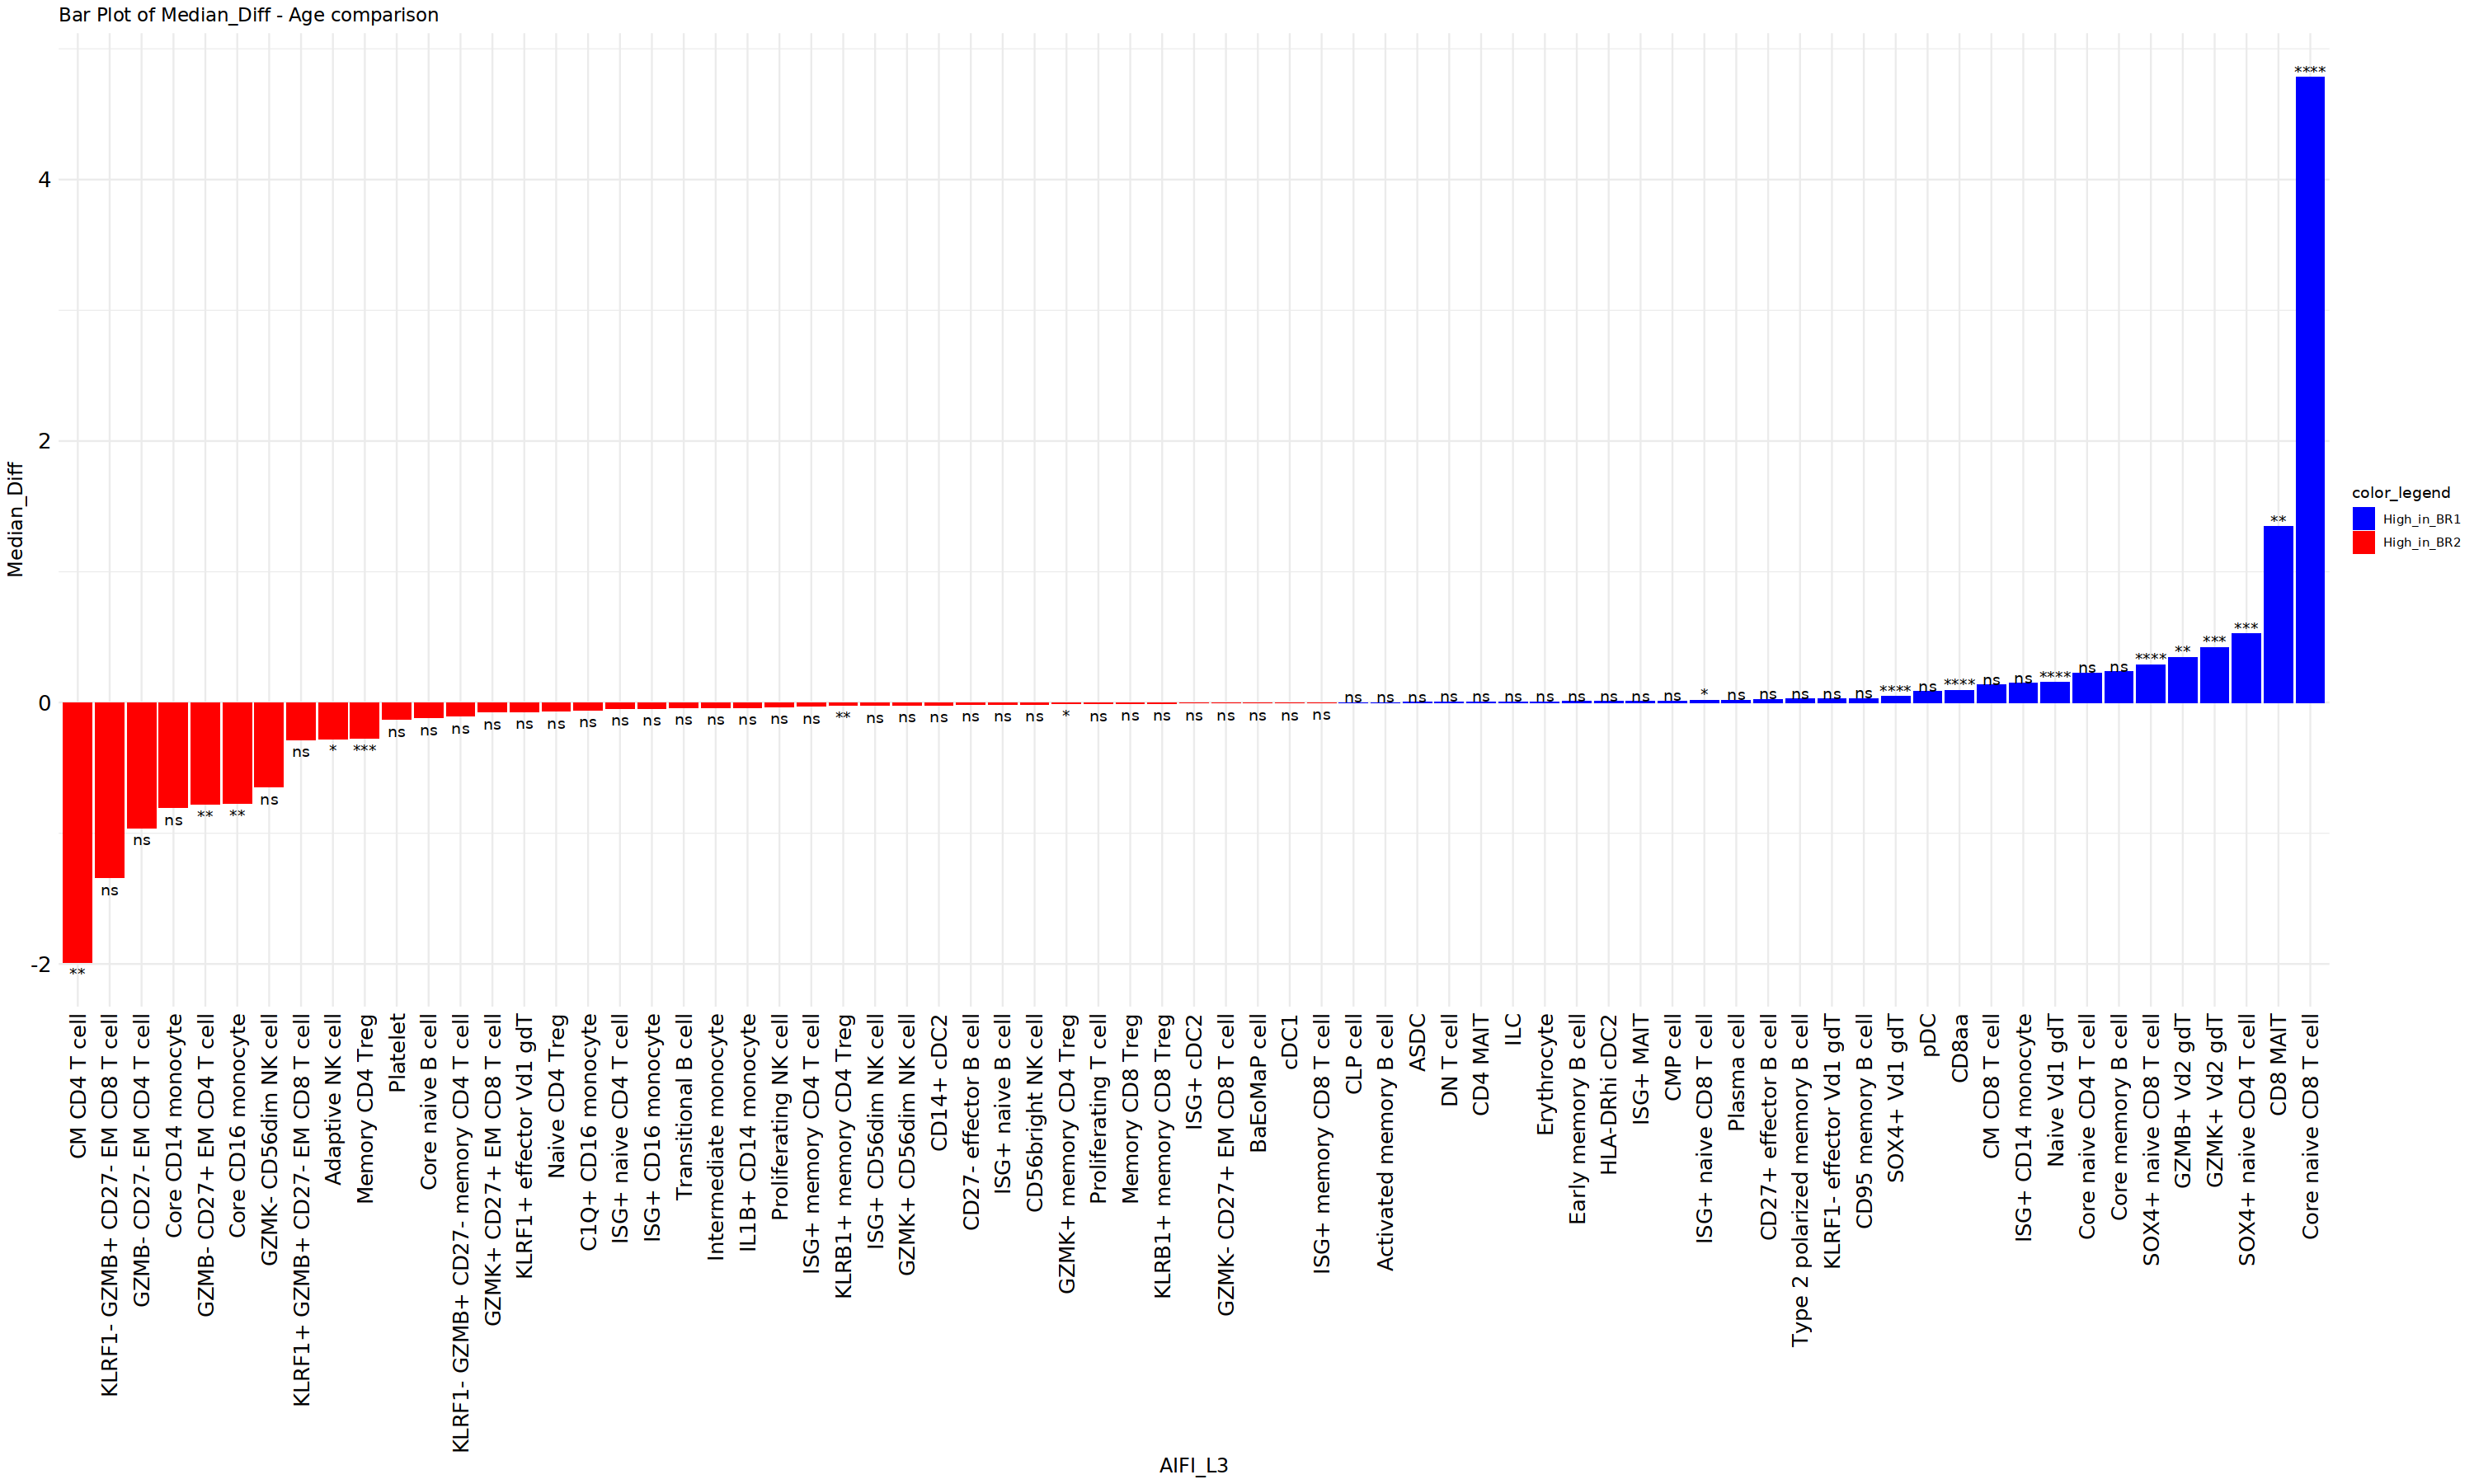

In [112]:
#Median_Plot - Age
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend<- ifelse(result_df$Median_Diff >= 0, "High_in_BR1", "High_in_BR2")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = reorder(AIFI_L3, desc(-Median_Diff)), y = Median_Diff, fill = color_legend)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of Median_Diff - Age comparison",
       x = "AIFI_L3",
       y = "Median_Diff") +
  scale_fill_manual(values = c("High_in_BR1" = "blue", "High_in_BR2" = "red"),
                    breaks = c("High_in_BR1", "High_in_BR2"),
                    labels = c("High_in_BR1", "High_in_BR2")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15),
                axis.title.x = element_text(size = 14),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 14))


# Add p-values to the plot using geom_text
p + geom_text(aes(label = p.adj.signif), 
              vjust = ifelse(merged_df$Median_Diff >= 0, 0, 1.5), 
              size = 4)


In [ ]:
#log2FC(mean diff) - Age
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(result_df$log2FC >= 0, "High_in_BR1", "High_in_BR2")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = reorder(AIFI_L3, desc(-log2FC)), y = log2FC, fill = color_legend)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of log2FC(Median_Diff) - Age comparison",
       x = "AIFI_L3",
       y = "log2FC(Median_Diff)") +
  scale_fill_manual(values = c("High_in_BR1" = "blue", "High_in_BR2" = "red"),
                    breaks = c("High_in_BR1", "High_in_BR2"),
                    labels = c("High_in_BR1", "High_in_BR2")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15),
                axis.title.x = element_text(size = 14),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 14))


# Add p-values to the plot using geom_text
p + geom_text(aes(label = p.adj.signif), 
              vjust = ifelse(merged_df$log2FC >= 0, 0, 1.5), 
              size = 4)


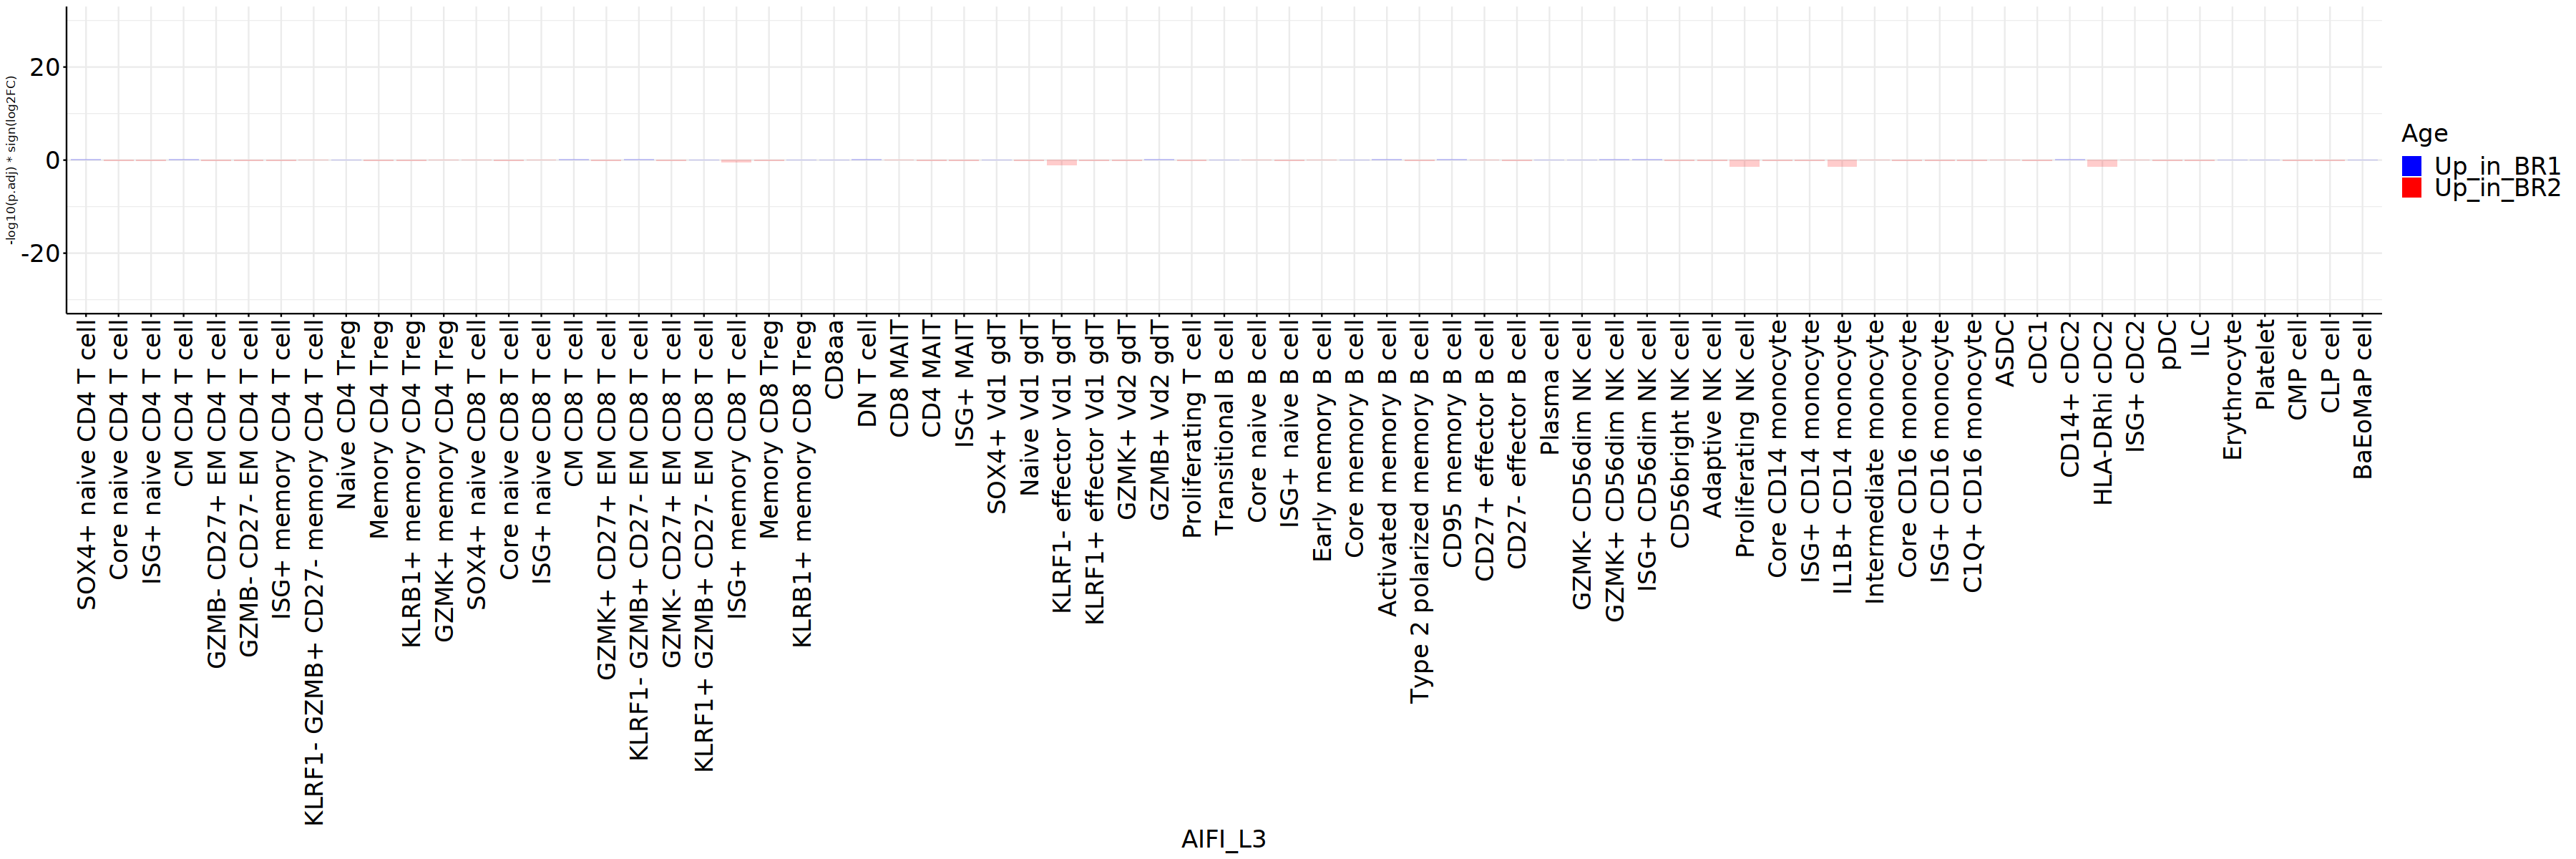

In [94]:
#-log10(p.adj) * sign(log2FC - Age
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(merged_df$product_column >= 0, "Up_in_BR1", "Up_in_BR2")

options(repr.plot.width = 30, repr.plot.height = 10)
p <- ggplot(merged_df, aes(x = AIFI_L3, y = product_column, fill = color_legend)) +
  geom_bar(stat = "identity", , alpha = ifelse(merged_df$p.adj > 0.05, 0.2, 1)) +
  labs(
      #title = "Bar Plot of -log10(p.adj) * sign(log2FC) - Age comparison",
       x = "AIFI_L3",
       y = "-log10(p.adj) * sign(log2FC)") +
  scale_fill_manual(values = c("Up_in_BR1" = "blue", "Up_in_BR2" = "red"),
                    breaks = c("Up_in_BR1", "Up_in_BR2"),
                    labels = c("Up_in_BR1", "Up_in_BR2")) +
  theme_minimal() +
  #coord_flip()+
   theme(strip.text = element_text(size = 15, color= "black"),
                axis.text.x = element_text(color = "black",
                                           size = 20,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 20),
                axis.title.x = element_text(size = 20),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 10),
                legend.title = element_text(size = 20),
                legend.text = element_text(size = 20),
                axis.line = element_line(color = "black", size = 0.5),
                axis.ticks = element_line(color = "black"),
                axis.text = element_text(size = 12))


# Add p-values to the plot using geom_text

p + 
#geom_text(aes(label = p.adj.signif), vjust = ifelse(merged_df$log2FC >= 0, 0, 1.5), size = 4)+
    coord_cartesian(ylim = c(-30, 30)) + labs(fill= "Age") 

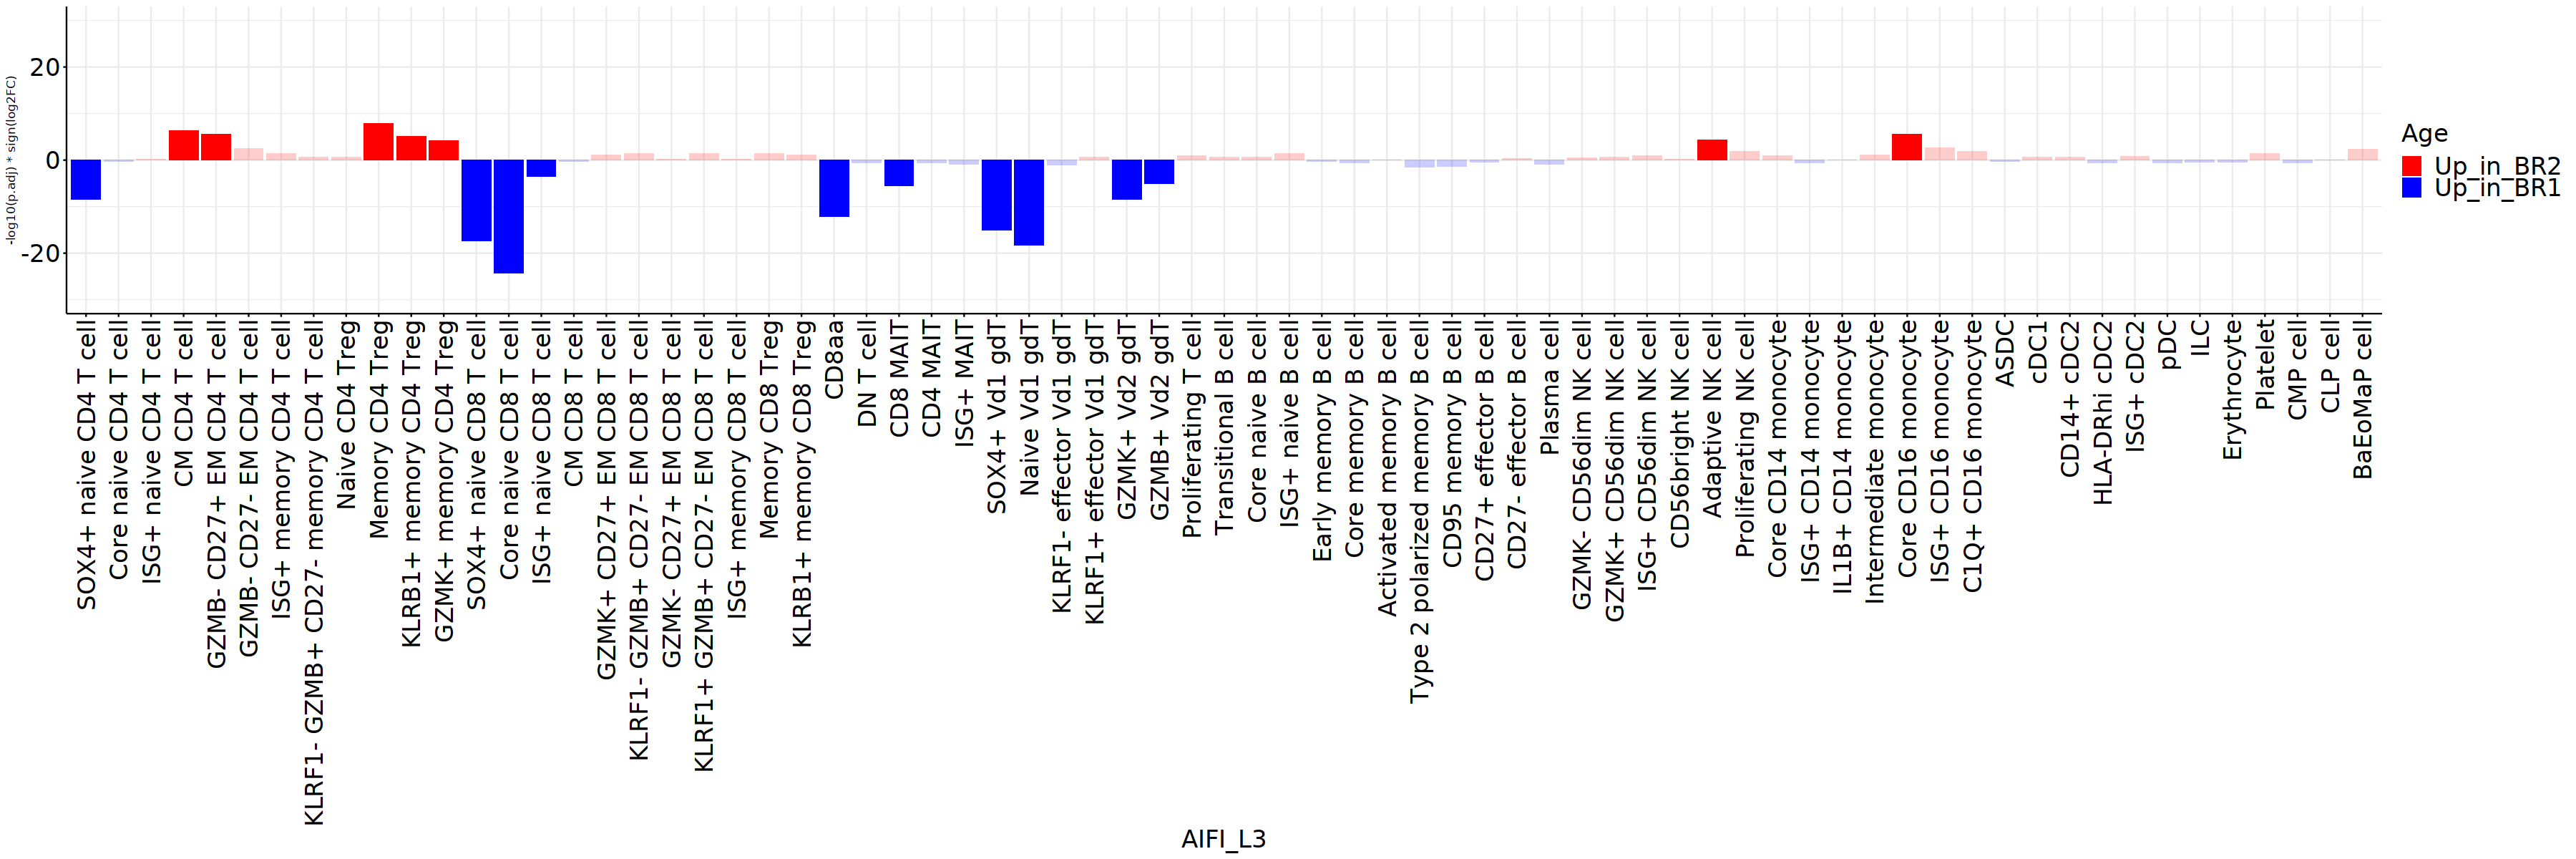

In [124]:
#-log10(p.adj) * sign(log2FC - Age
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(merged_df$product_column >= 0, "Up_in_BR2", "Up_in_BR1")

options(repr.plot.width = 30, repr.plot.height = 10)
p <- ggplot(merged_df, aes(x = AIFI_L3, y = product_column, fill = color_legend)) +
  geom_bar(stat = "identity", , alpha = ifelse(merged_df$p.adj > 0.05, 0.2, 1)) +
  labs(
      #title = "Bar Plot of -log10(p.adj) * sign(log2FC) - Age comparison",
       x = "AIFI_L3",
       y = "-log10(p.adj) * sign(log2FC)") +
  scale_fill_manual(values = c( "Up_in_BR2" = "red", "Up_in_BR1" = "blue"),
                    breaks = c("Up_in_BR2", "Up_in_BR1"),
                    labels = c("Up_in_BR2", "Up_in_BR1")) +
  theme_minimal() +
  #coord_flip()+
   theme(strip.text = element_text(size = 15, color= "black"),
                axis.text.x = element_text(color = "black",
                                           size = 20,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 20),
                axis.title.x = element_text(size = 20),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 10),
                legend.title = element_text(size = 20),
                legend.text = element_text(size = 20),
                axis.line = element_line(color = "black", size = 0.5),
                axis.ticks = element_line(color = "black"),
                axis.text = element_text(size = 12), )
                #legend.position = "none")


# Add p-values to the plot using geom_text

p + 
#geom_text(aes(label = p.adj.signif), vjust = ifelse(merged_df$log2FC >= 0, 0, 1.5), size = 4)+
    coord_cartesian(ylim = c(-30, 30)) + labs(fill= "Age") 

###  Scatter plot (Correlation): -log10(p.adj) * sign(log2FC(Median_diff))

In [ ]:
#continuous code
#
result_df <- result %>%
  dplyr::group_by(AIFI_L3, cohort.cohortGuid) %>%
  dplyr::summarise(median_percentage = median(percentage)) 

result_df <- result_df %>% spread(cohort.cohortGuid, median_percentage)

result_df <- result_df %>%  
        mutate(Median_Diff = (BR1 - BR2)) %>%
        mutate(log2FC = log2(BR1/BR2))

stat_test<- result %>%
  select(percentage,percentage_clr, AIFI_L3, cohort.cohortGuid) %>%
  unique(.) %>%
  group_by(AIFI_L3) %>%
  wilcox_test(percentage_clr ~ cohort.cohortGuid) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()

merged_df <- merge(result_df, stat_test, by = "AIFI_L3")

merged_df <- merged_df %>% mutate(minus_log10_p_adj = -log(p.adj),
                                  sign_log2FC = sign(log2FC),
                                 product_column = (minus_log10_p_adj * sign_log2FC))



In [ ]:
head(result)

In [ ]:
result_df <- result %>%
  dplyr::group_by(AIFI_L3, cohort.cohortGuid, subject.subjectGuid) %>%
  dplyr::summarise(median_percentage = median(percentage))
head(result_df)

In [ ]:
result_df %>% filter(subject.subjectGuid == "BR1001") %>% 
      select(median_percentage) %>%
      pull() %>% 
      sum()

In [ ]:
stat_test<- result_df %>%
  select(median_percentage, AIFI_L3, cohort.cohortGuid) %>%
  unique(.) %>%
  group_by(AIFI_L3) %>%
  wilcox_test(median_percentage ~ cohort.cohortGuid) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()

In [ ]:
stat_test

In [ ]:
library(ggplot2)

# Assuming your dataframe is named 'df'

# Create the scatter plot
ggplot(merged_df, aes(x = BR1 * sign_log2FC, y = BR2 * sign_log2FC)) +
  geom_point() +  # Add points
  labs(x = "BR1 * sign(log2FC)", y = "BR2* sign(log2FC)", 
       title = "Scatter Plot Correlation") +
  theme_minimal()


In [ ]:
library(ggplot2)

# Assuming your dataframe is named 'df'

# Calculate the new columns for BR1 and BR2 separately
df <- merged_df %>%
  mutate(BR1_score = -log10(p.adj) * sign_log2FC * BR1,
         BR2_score = -log10(p.adj) * sign_log2FC * BR2)

# Create the scatter plot
ggplot(df, aes(x = BR1_score, y = BR2_score)) +
  geom_point() +  # Add points
  labs(x = "BR1_score", y = "BR2_score", 
       title = "Scatter Plot Correlation") +
  theme_minimal()


## CMV

In [ ]:
head(result)

In [125]:
#without Any other seperation

result_df <- result %>%
  dplyr::group_by(AIFI_L3, CMV.IgG.Serology.Result.Interpretation) %>%
  dplyr::summarise(mean_percentage = mean(percentage),
                    median_percentage = median(percentage))

# Print the result
print(result_df)

`summarise()` has grouped output by 'AIFI_L3'. You can override using the
`.groups` argument.


# A tibble: 142 × 4
# Groups:   AIFI_L3 [71]
   AIFI_L3              CMV.IgG.Serology.Res…¹ mean_percentage median_percentage
   <chr>                <chr>                            <dbl>             <dbl>
 1 ASDC                 Negative                       0.0222            0.0210 
 2 ASDC                 Positive                       0.0252            0.0232 
 3 Activated memory B … Negative                       0.0250            0.0241 
 4 Activated memory B … Positive                       0.0272            0.0222 
 5 Adaptive NK cell     Negative                       0.243             0.138  
 6 Adaptive NK cell     Positive                       1.72              0.726  
 7 BaEoMaP cell         Negative                       0.00832           0.00636
 8 BaEoMaP cell         Positive                       0.00849           0.00646
 9 C1Q+ CD16 monocyte   Negative                       0.214             0.176  
10 C1Q+ CD16 monocyte   Positive                       0.260    

### Mean

In [ ]:
#continuous code
#
result_df <- result %>%
  dplyr::group_by(AIFI_L3, CMV.IgG.Serology.Result.Interpretation) %>%
  dplyr::summarise(mean_percentage = mean(percentage),
                    median_percentage = median(percentage))

result_df_mean <- result_df[, c("AIFI_L3", "CMV.IgG.Serology.Result.Interpretation", "mean_percentage")]


result_df_mean <- result_df_mean %>% spread(CMV.IgG.Serology.Result.Interpretation, mean_percentage)

result_df_mean <- result_df_mean %>%  
        mutate(Mean_Diff = (Positive - Negative)) %>%
        mutate(log2FC = log2(Positive/Negative))


stat_test<- result %>%
  select(percentage,percentage_clr, AIFI_L3, CMV.IgG.Serology.Result.Interpretation) %>%
  unique(.) %>%
  group_by(AIFI_L3) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()

merged_df <- merge(result_df_mean, stat_test, by = "AIFI_L3")

merged_df <- merged_df %>% mutate(minus_log10_p_adj = -log(p.adj),
                                  sign_log2FC = sign(log2FC),
                                 product_column = (minus_log10_p_adj * sign_log2FC))



In [ ]:
#Mean_Plot - CMV
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(result_df_mean$Mean_Diff >= 0, "Up_in_Positive", "Up_in_Negative")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = reorder(AIFI_L3, desc(-Mean_Diff)), y = Mean_Diff, fill = color_legend)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of Mean_Diff - CMV comparison",
       x = "AIFI_L3",
       y = "Mean_Diff") +
  scale_fill_manual(values = c("Up_in_Positive" = "blue", "Up_in_Negative" = "red"),
                    breaks = c("Up_in_Positive", "Up_in_Negative"),
                    labels = c("Up_in_Positive", "Up_in_Negative")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15),
                axis.title.x = element_text(size = 14),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 14))


# Add p-values to the plot using geom_text
p + geom_text(aes(label = p.adj.signif), 
              vjust = ifelse(merged_df$Mean_Diff >= 0, 0, 1.5), 
              size = 4)


In [ ]:
#Mean_Plot - CMV
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(result_df_mean$log2FC >= 0, "Up_in_Positive", "Up_in_Negative")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = reorder(AIFI_L3, desc(-log2FC)), y = log2FC, fill = color_legend)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of log2FC(Mean_Diff) - CMV comparison",
       x = "AIFI_L3",
       y = "Mean_Diff") +
  scale_fill_manual(values = c("Up_in_Positive" = "blue", "Up_in_Negative" = "red"),
                    breaks = c("Up_in_Positive", "Up_in_Negative"),
                    labels = c("Up_in_Positive", "Up_in_Negative")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15),
                axis.title.x = element_text(size = 14),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 14))


# Add p-values to the plot using geom_text
p + geom_text(aes(label = p.adj.signif), 
              vjust = ifelse(merged_df$log2FC >= 0, 0, 1.5), 
              size = 4)


### Median

In [126]:
#continuous code
#
result_df <- result %>%
  dplyr::group_by(AIFI_L3, CMV.IgG.Serology.Result.Interpretation) %>%
  dplyr::summarise(mean_percentage = mean(percentage),
                    median_percentage = median(percentage))

result_df_median<- result_df[, c("AIFI_L3", "CMV.IgG.Serology.Result.Interpretation", "median_percentage")]


result_df_median <- result_df_median %>% spread(CMV.IgG.Serology.Result.Interpretation, median_percentage)

result_df_median <- result_df_median %>%  
        mutate(Median_Diff = (Positive - Negative)) %>%
        mutate(log2FC = log2(Positive/Negative))

stat_test<- result %>%
  select(percentage,percentage_clr, AIFI_L3, CMV.IgG.Serology.Result.Interpretation) %>%
  unique(.) %>%
  group_by(AIFI_L3) %>%
  wilcox_test(percentage_clr ~ CMV.IgG.Serology.Result.Interpretation) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()

#result_df_median$AIFI_L3 <- gsub("Core naive CD8 T cell ", "Core naive CD8 T cell", result_df_median$AIFI_L3 )


merged_df <- merge(result_df_median, stat_test, by = "AIFI_L3")

merged_df <- merged_df %>% mutate(minus_log10_p_adj = -log(p.adj),
                                  sign_log2FC = sign(log2FC),
                                 product_column = (minus_log10_p_adj * sign_log2FC))

merged_df$AIFI_L3 <- factor(merged_df$AIFI_L3, levels = desired_labels)

`summarise()` has grouped output by 'AIFI_L3'. You can override using the
`.groups` argument.


In [ ]:
#Median_Plot - CMV
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(result_df_median$Median_Diff >= 0, "Up_in_Positive", "Up_in_Negative")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = reorder(AIFI_L3, desc(-Median_Diff)), y = Median_Diff, fill = color_legend)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of Median_Diff - CMV comparison",
       x = "AIFI_L3",
       y = "Median_Diff") +
  scale_fill_manual(values = c("Up_in_Positive" = "blue", "Up_in_Negative" = "red"),
                    breaks = c("Up_in_Positive", "Up_in_Negative"),
                    labels = c("Up_in_Positive", "Up_in_Negative")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15),
                axis.title.x = element_text(size = 14),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 14))


# Add p-values to the plot using geom_text
p + geom_text(aes(label = p.adj.signif), 
              vjust = ifelse(merged_df$Median_Diff >= 0, 0, 1.5), 
              size = 4)


In [ ]:
#log2FC(Median_Diff) - CMV
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(result_df_median$log2FC >= 0, "Up_in_Positive", "Up_in_Negative")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = reorder(AIFI_L3, desc(-log2FC)), y = log2FC, fill = color_legend)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of log2FC(Median_Diff) - CMV comparison",
       x = "AIFI_L3",
       y = "Median_Diff") +
  scale_fill_manual(values = c("Up_in_Positive" = "blue", "Up_in_Negative" = "red"),
                    breaks = c("Up_in_Positive", "Up_in_Negative"),
                    labels = c("Up_in_Positive", "Up_in_Negative")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15),
                axis.title.x = element_text(size = 14),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 14))


# Add p-values to the plot using geom_text
p + geom_text(aes(label = p.adj.signif), 
              vjust = ifelse(merged_df$log2FC >= 0, 0, 1.5), 
              size = 4)


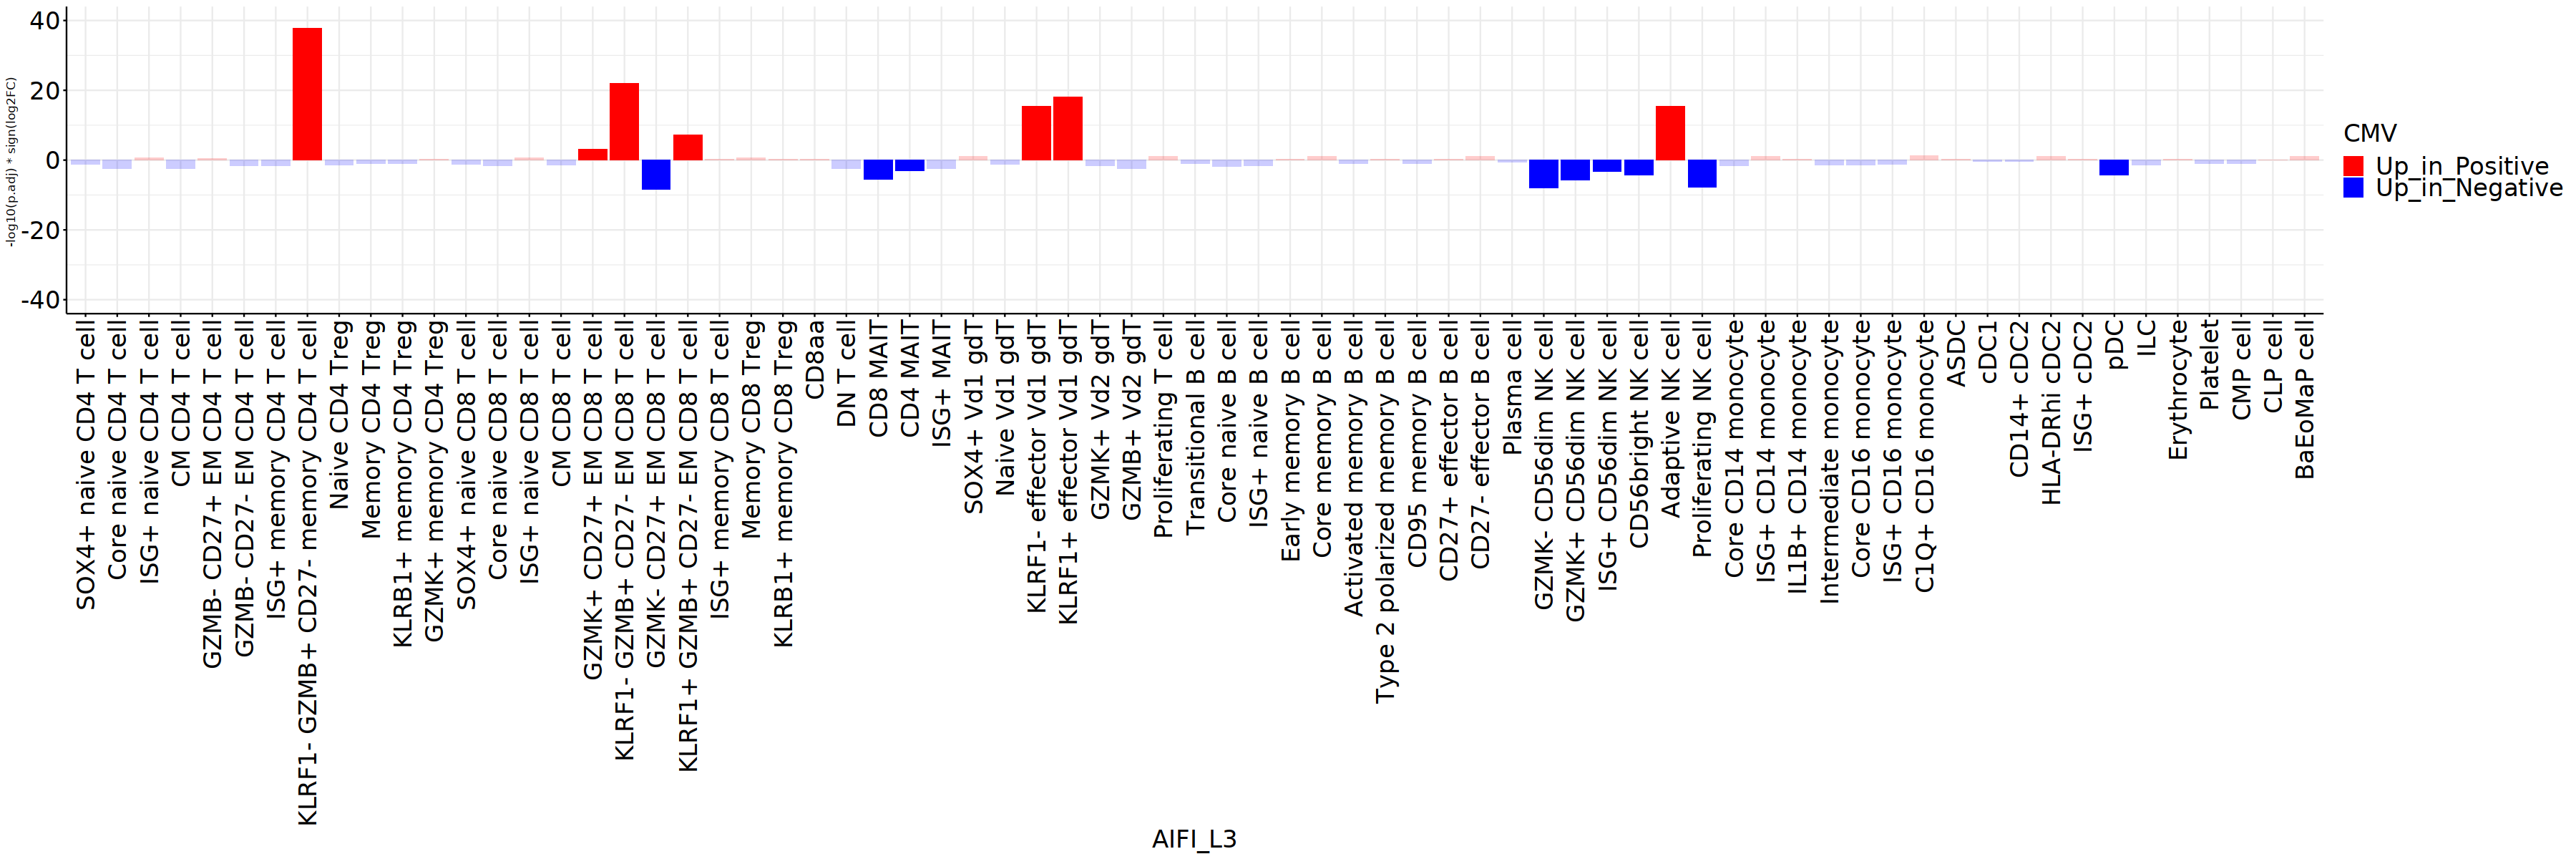

In [128]:
#log2FC(Median_Diff) - CMV
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(merged_df$product_column >= 0, "Up_in_Positive", "Up_in_Negative")

options(repr.plot.width = 30, repr.plot.height = 10)
p <- ggplot(merged_df, aes(x = AIFI_L3, y = product_column, fill = color_legend)) +
  geom_bar(stat = "identity", , alpha = ifelse(merged_df$p.adj > 0.05, 0.2, 1)) +
  labs(
      #title = "Bar Plot of -log10(p.adj) * sign(log2FC)  - CMV comparison",
       x = "AIFI_L3",
       y = "-log10(p.adj) * sign(log2FC) ") +
  scale_fill_manual(values = c("Up_in_Positive" = "red", "Up_in_Negative" = "blue"),
                    breaks = c("Up_in_Positive", "Up_in_Negative"),
                    labels = c("Up_in_Positive", "Up_in_Negative")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15, color= "black"),
                axis.text.x = element_text(color = "black",
                                           size = 20,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 20),
                axis.title.x = element_text(size = 20),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 10),
                legend.title = element_text(size = 20),
                legend.text = element_text(size = 20),
                axis.line = element_line(color = "black", size = 0.5),
                axis.ticks = element_line(color = "black"),
                axis.text = element_text(size = 12),)
               #legend.position = "none")


# Add p-values to the plot using geom_text

p + 
#geom_text(aes(label = p.adj.signif),  vjust = ifelse(merged_df$log2FC >= 0, 0, 1.5),  size = 4)+
    coord_cartesian(ylim = c(-40, 40)) + labs(fill= "CMV") 

## Sex

In [ ]:
head(result)

In [130]:
#without Any other seperation

result_df <- result %>%
  dplyr::group_by(AIFI_L3, subject.biologicalSex) %>%
  dplyr::summarise(mean_percentage = mean(percentage),
                    median_percentage = median(percentage))

# Print the result
print(result_df)

`summarise()` has grouped output by 'AIFI_L3'. You can override using the
`.groups` argument.


# A tibble: 142 × 4
# Groups:   AIFI_L3 [71]
   AIFI_L3               subject.biologicalSex mean_percentage median_percentage
   <chr>                 <chr>                           <dbl>             <dbl>
 1 ASDC                  Female                        0.0235            0.0230 
 2 ASDC                  Male                          0.0236            0.0220 
 3 Activated memory B c… Female                        0.0310            0.0271 
 4 Activated memory B c… Male                          0.0202            0.0176 
 5 Adaptive NK cell      Female                        0.455             0.197  
 6 Adaptive NK cell      Male                          1.49              0.472  
 7 BaEoMaP cell          Female                        0.00814           0.00628
 8 BaEoMaP cell          Male                          0.00880           0.00853
 9 C1Q+ CD16 monocyte    Female                        0.229             0.215  
10 C1Q+ CD16 monocyte    Male                          0.242    

### Mean

In [ ]:
#continuous code
#
result_df <- result %>%
  dplyr::group_by(AIFI_L3, subject.biologicalSex) %>%
  dplyr::summarise(mean_percentage = mean(percentage),
                    median_percentage = median(percentage))

result_df_mean <- result_df[, c("AIFI_L3", "subject.biologicalSex", "mean_percentage")]


result_df_mean <- result_df_mean %>% spread(subject.biologicalSex, mean_percentage)

result_df_mean <- result_df_mean %>%  
        mutate(Mean_Diff = (Female - Male)) %>%
        mutate(log2FC = log2(Female/Male))


stat_test<- result %>%
  select(percentage,percentage_clr, AIFI_L3, subject.biologicalSex) %>%
  unique(.) %>%
  group_by(AIFI_L3) %>%
  wilcox_test(percentage_clr ~ subject.biologicalSex) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()

merged_df <- merge(result_df_mean, stat_test, by = "AIFI_L3")

merged_df <- merged_df %>% mutate(minus_log10_p_adj = -log(p.adj),
                                  sign_log2FC = sign(log2FC),
                                 product_column = (minus_log10_p_adj * sign_log2FC))



In [ ]:
#Mean_Plot - CMV
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(result_df_mean$Mean_Diff >= 0, "Up_in_Female", "Up_in_Male")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = reorder(AIFI_L3, desc(-Mean_Diff)), y = Mean_Diff, fill = color_legend)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of Mean_Diff - Sex comparison",
       x = "AIFI_L3",
       y = "Mean_Diff") +
  scale_fill_manual(values = c("Up_in_Female" = "blue", "Up_in_Male" = "red"),
                    breaks = c("Up_in_Female", "Up_in_Male"),
                    labels = c("Up_in_Female", "Up_in_Male")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15),
                axis.title.x = element_text(size = 14),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 14))


# Add p-values to the plot using geom_text
p + geom_text(aes(label = p.adj.signif), 
              vjust = ifelse(merged_df$Mean_Diff >= 0, 0, 1.5), 
              size = 4)


In [ ]:
#Mean_Plot - CMV
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(result_df_mean$log2FC >= 0, "Up_in_Female", "Up_in_Male")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = reorder(AIFI_L3, desc(-log2FC)), y = log2FC, fill = color_legend)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of log2FC(Mean_Diff) - Sex comparison",
       x = "AIFI_L3",
       y = "Mean_Diff") +
  scale_fill_manual(values = c("Up_in_Female" = "blue", "Up_in_Male" = "red"),
                    breaks = c("Up_in_Female", "Up_in_Male"),
                    labels = c("Up_in_Female", "Up_in_Male")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15),
                axis.title.x = element_text(size = 14),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 14))


# Add p-values to the plot using geom_text
p + geom_text(aes(label = p.adj.signif), 
              vjust = ifelse(merged_df$log2FC >= 0, 0, 1.5), 
              size = 4)


### Median

In [131]:
#continuous code
#
result_df <- result %>%
  dplyr::group_by(AIFI_L3, subject.biologicalSex) %>%
  dplyr::summarise(mean_percentage = mean(percentage),
                    median_percentage = median(percentage))

result_df_median<- result_df[, c("AIFI_L3", "subject.biologicalSex", "median_percentage")]


result_df_median <- result_df_median %>% spread(subject.biologicalSex, median_percentage)

result_df_median <- result_df_median %>%  
        mutate(Median_Diff = (Female - Male)) %>%
        mutate(log2FC = log2(Female/Male))


stat_test<- result %>%
  select(percentage,percentage_clr, AIFI_L3, subject.biologicalSex) %>%
  unique(.) %>%
  group_by(AIFI_L3) %>%
  wilcox_test(percentage_clr ~ subject.biologicalSex) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()

#result_df_median$AIFI_L3 <- gsub("Core naive CD8 T cell ", "Core naive CD8 T cell", result_df_median$AIFI_L3 )

merged_df <- merge(result_df_median, stat_test, by = "AIFI_L3")

merged_df <- merged_df %>% mutate(minus_log10_p_adj = -log(p.adj),
                                  sign_log2FC = sign(log2FC),
                                 product_column = (minus_log10_p_adj * sign_log2FC))


merged_df$AIFI_L3 <- factor(merged_df$AIFI_L3, levels = desired_labels)

`summarise()` has grouped output by 'AIFI_L3'. You can override using the
`.groups` argument.


In [ ]:
#Median_Plot - Sex
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(result_df_median$Median_Diff >= 0, "Up_in_Female", "Up_in_Male")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = reorder(AIFI_L3, desc(-Median_Diff)), y = Median_Diff, fill = color_legend)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of Median_Diff - Sex comparison",
       x = "AIFI_L3",
       y = "Median_Diff") +
  scale_fill_manual(values = c("Up_in_Female" = "blue", "Up_in_Male" = "red"),
                    breaks = c("Up_in_Female", "Up_in_Male"),
                    labels = c("Up_in_Female", "Up_in_Male")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15),
                axis.title.x = element_text(size = 14),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 14))


# Add p-values to the plot using geom_text
p + geom_text(aes(label = p.adj.signif), 
              vjust = ifelse(merged_df$Median_Diff >= 0, 0, 1.5), 
              size = 4)


In [ ]:
#log2FC(Median_Diff) - CSex
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(result_df_median$log2FC >= 0, "Up_in_Female", "Up_in_Male")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = reorder(AIFI_L3, desc(-log2FC)), y = log2FC, fill = color_legend)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of log2FC(Median_Diff) - Sex comparison",
       x = "AIFI_L3",
       y = "log2FC(Median_Diff)") +
  scale_fill_manual(values = c("Up_in_Female" = "blue", "Up_in_Male" = "red"),
                    breaks = c("Up_in_Female", "Up_in_Male"),
                    labels = c("Up_in_Female", "Up_in_Male")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15),
                axis.title.x = element_text(size = 14),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 14))


# Add p-values to the plot using geom_text
p + geom_text(aes(label = p.adj.signif), 
              vjust = ifelse(merged_df$log2FC >= 0, 0, 1.5), 
              size = 4)


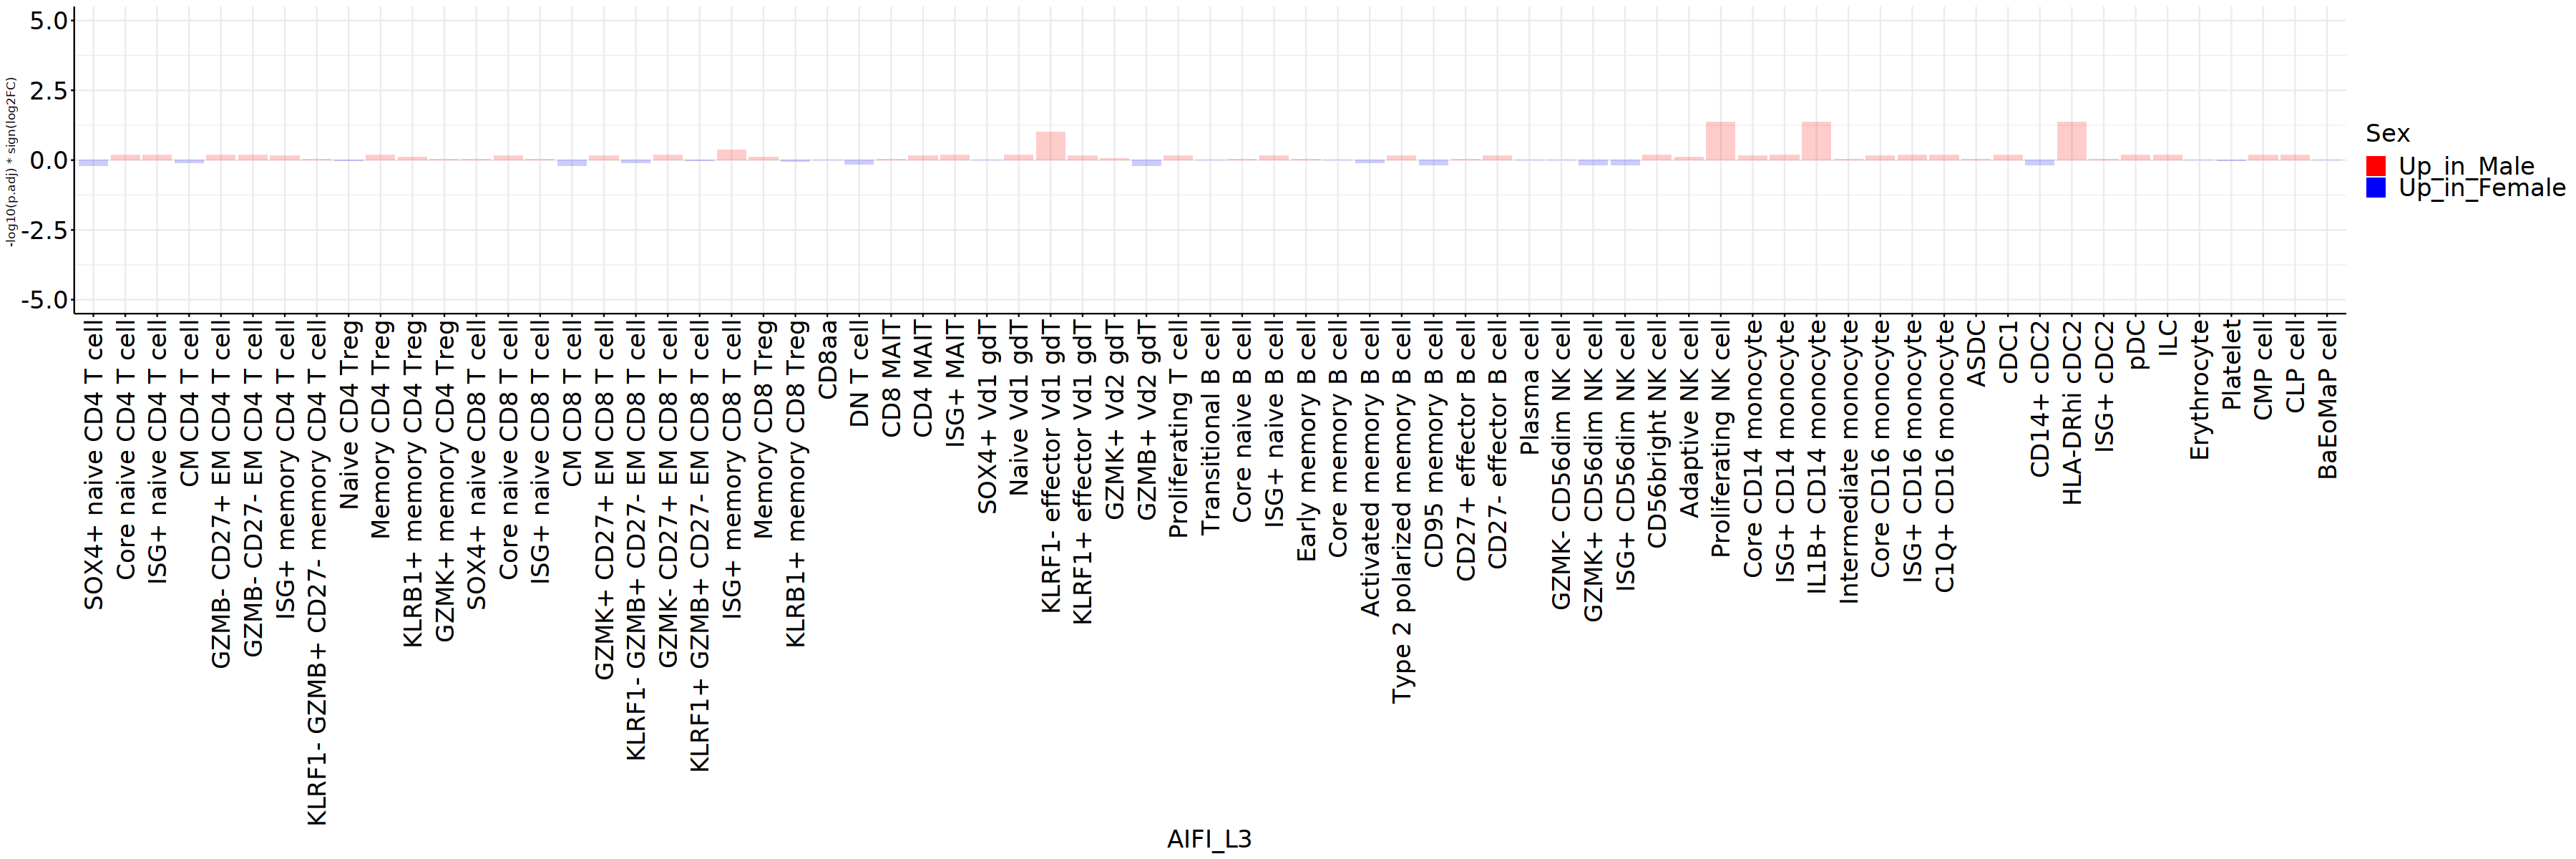

In [161]:
#-log10(p.adj) * sign(log2FC)  - Sex
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(merged_df$product_column >= 0, "Up_in_Female", "Up_in_Male")

options(repr.plot.width = 30, repr.plot.height = 10)
p <- ggplot(merged_df, aes(x = AIFI_L3, y = -product_column, fill = color_legend)) +
  geom_bar(stat = "identity", alpha = ifelse(merged_df$p.adj > 0.05, 0.2, 1)) +
  labs(
      #title = "Bar Plot of log2FC(Median_Diff) - Sex comparison",
       x = "AIFI_L3",
       y = "-log10(p.adj) * sign(log2FC) ") +
  scale_fill_manual(values = c("Up_in_Male" = "red", "Up_in_Female" = "blue"),
                    breaks = c("Up_in_Male", "Up_in_Female"),
                    labels = c("Up_in_Male", "Up_in_Female")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15, color= "black"),
                axis.text.x = element_text(color = "black",
                                           size = 20,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 20),
                axis.title.x = element_text(size = 20),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 10),
                legend.title = element_text(size = 20),
                legend.text = element_text(size = 20),
                axis.line = element_line(color = "black", size = 0.5),
                axis.ticks = element_line(color = "black"),
                axis.text = element_text(size = 12),)
                #legend.position= "none")


# Add p-values to the plot using geom_text

p + 
#geom_text(aes(label = p.adj.signif), vjust = ifelse(merged_df$log2FC >= 0, 0, 1.5), size = 4)+
    coord_cartesian(ylim = c(-5, 5)) + labs(fill= "Sex") 


## Flu

In [42]:
# Read the CSV file into a data frame (No UP1)
flu_df <- read.csv('/home/jupyter/Myeloid_cells/files/AIFI_fluYr1Yr2_raw.csv')


In [43]:
dict <- read.csv('/home/jupyter/Myeloid_cells/files/Dictionary_AIFI_Reference.csv')

In [ ]:
unique(flu_df$cohort.cohortGuid)
#unique(flu_df$AIFI_L3.5)
#unique(flu_df$AIFI_L1)

In [ ]:
nrow(flu_df)

In [ ]:
rownames(flu_df)<-flu_df$cell_uuid

In [59]:
clr_transform <- function(x) {
  if (length(x) == 0) {
    return(NA)  # return NA for empty vectors
  }
  geom_mean <- exp(mean(log(x)))
  return(log(x / geom_mean))
}

In [136]:
## Percentage of total

result <- flu_df %>%
  dplyr::group_by(AIFI_L3, subject.subjectGuid, sample.visitName ) %>%               
  dplyr::summarise(count = n()) %>%                  # Count occurrences
  dplyr::group_by(subject.subjectGuid) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(subject.subjectGuid) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% # Group again by subjectGuid for CLR# Calculate percentage
  dplyr::ungroup()

head(result)
#sum(result$subject.subjectGuid)

`summarise()` has grouped output by 'AIFI_L3', 'subject.subjectGuid'. You can
override using the `.groups` argument.


AIFI_L3,subject.subjectGuid,sample.visitName,count,percentage,percentage_clr
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
ASDC,BR1001,Flu Year 1 Day 0,6,0.015767897,-2.171010
ASDC,BR1001,Flu Year 1 Day 7,5,0.013139914,-2.353331
ASDC,BR1002,Flu Year 1 Day 0,3,0.004528234,-2.529700
ASDC,BR1002,Flu Year 1 Day 7,2,0.003018822,-2.935165
ASDC,BR1002,Flu Year 2 Day 0,3,0.004528234,-2.529700
ASDC,BR1002,Flu Year 2 Day 7,2,0.003018822,-2.935165


In [137]:
result %>% filter(subject.subjectGuid == "BR1001") %>% 
      select(percentage) %>%
      pull() %>% 
      sum()

[1] 100

In [138]:
result<-left_join(result,unique(flu_df[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex', 'CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))

In [139]:
result$AIFI_L3 <- gsub("Core naive CD8 T cell ", "Core naive CD8 T cell", result$AIFI_L3 )

In [140]:
result_yr1 <- result %>% filter(sample.visitName == "Flu Year 1 Day 0" | sample.visitName == "Flu Year 1 Day 7")

In [141]:
filtered_data <- result_yr1 %>%
  group_by(AIFI_L3,subject.subjectGuid) %>%
  filter(all(c("Flu Year 1 Day 0", "Flu Year 1 Day 7") %in% sample.visitName))
#head(filtered_data)


In [142]:
## testing label organization
# Read the CSV file containing the desired labels
label_data <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks/Mansi_Notebooks/scRNA/Frequency_Plot/Immune_Cell_Order_forDEGsummary - Sheet1.csv", header = TRUE)

# Extract the labels from the CSV file
desired_labels <- label_data$FINAL.ORDER




### Median

In [143]:
#continuous code
#
result_df <- filtered_data %>%
  dplyr::group_by(AIFI_L3, sample.visitName) %>%
  dplyr::summarise(mean_percentage = mean(percentage),
                    median_percentage = median(percentage))

result_df_median<- result_df[, c("AIFI_L3", "sample.visitName", "median_percentage")]


result_df_median <- result_df_median %>% spread(sample.visitName, median_percentage)

result_df_median <- result_df_median %>%  
          mutate(Median_Diff = (`Flu Year 1 Day 0` - `Flu Year 1 Day 7`)) %>%
          mutate(log2FC = log2(`Flu Year 1 Day 0` / `Flu Year 1 Day 7`))
#head(result_df_median)


stat_test<- filtered_data %>%
  select(percentage,percentage_clr, AIFI_L3, sample.visitName) %>%
  unique(.) %>%
  group_by(AIFI_L3) %>%
  wilcox_test(percentage_clr ~ sample.visitName, paired= TRUE) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()

significant_cell_types <- stat_test %>%
  filter(p.adj < 0.05) %>%
  select(AIFI_L3, .y., p, p.adj, p.adj.signif) %>%
  unique()

print(significant_cell_types)

merged_df <- merge(result_df_median, stat_test, by = "AIFI_L3")

merged_df <- merged_df %>% mutate(minus_log10_p_adj = -log(p.adj),
                                  sign_log2FC = sign(log2FC),
                                 product_column = (minus_log10_p_adj * sign_log2FC))

merged_df$AIFI_L3 <- factor(merged_df$AIFI_L3, levels = desired_labels)



`summarise()` has grouped output by 'AIFI_L3'. You can override using the
`.groups` argument.
Adding missing grouping variables: `subject.subjectGuid`


# A tibble: 8 × 5
  AIFI_L3               .y.                     p     p.adj p.adj.signif
  <chr>                 <chr>               <dbl>     <dbl> <chr>       
1 CD27+ effector B cell percentage_clr 0.0000376  0.000890  ***         
2 CD27- effector B cell percentage_clr 0.000338   0.00480   **          
3 CD95 memory B cell    percentage_clr 0.000603   0.00612   **          
4 ISG+ CD14 monocyte    percentage_clr 0.0000263  0.000890  ***         
5 ISG+ CD16 monocyte    percentage_clr 0.000594   0.00612   **          
6 ISG+ CD56dim NK cell  percentage_clr 0.000257   0.00456   **          
7 Intermediate monocyte percentage_clr 0.00168    0.0149    *           
8 Plasma cell           percentage_clr 0.00000132 0.0000937 ****        


In [ ]:
#Median_Plot - Flu
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(result_df_median$Median_Diff >= 0, "Up_in_Flu_Year_1_D0", "Up_in_Flu_Year_1_D7")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = reorder(AIFI_L3, desc(-Median_Diff)), y = Median_Diff, fill = color_legend)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of Median_Diff - Flu comparison",
       x = "AIFI_L3",
       y = "Median_Diff") +
  scale_fill_manual(values = c("Up_in_Flu_Year_1_D0" = "blue", "Up_in_Flu_Year_1_D7" = "red"),
                    breaks = c("Up_in_Flu_Year_1_D0", "Up_in_Flu_Year_1_D7"),
                    labels = c("Up_in_Flu_Year_1_D0", "Up_in_Flu_Year_1_D7")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15),
                axis.title.x = element_text(size = 14),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 14))


# Add p-values to the plot using geom_text
p + geom_text(aes(label = p.adj.signif), 
              vjust = ifelse(merged_df$Median_Diff >= 0, 0, 1.5), 
              size = 4)


In [ ]:
#log2FC(Median_Diff) - Flu
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(result_df_median$log2FC >= 0, "Up_in_Female", "Up_in_Male")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = AIFI_L3, y = log2FC, fill = color_legend)) +
  geom_bar(stat = "identity",  alpha = ifelse(merged_df$p.adj > 0.05, 0.2, 1)) +
  labs(title = "Bar Plot of log2FC(Median_Diff) - Flu comparison",
       x = "AIFI_L3",
       y = "log2FC(Median_Diff)") +
  scale_fill_manual(values = c("Up_in_Female" = "blue", "Up_in_Male" = "red"),
                    breaks = c("Up_in_Female", "Up_in_Male"),
                    labels = c("Up_in_Female", "Up_in_Male")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15),
                axis.title.x = element_text(size = 14),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 14))


# Add p-values to the plot using geom_text
p + geom_text(aes(label = p.adj.signif), 
              vjust = ifelse(merged_df$log2FC >= 0, 0, 1.5), 
              size = 4)


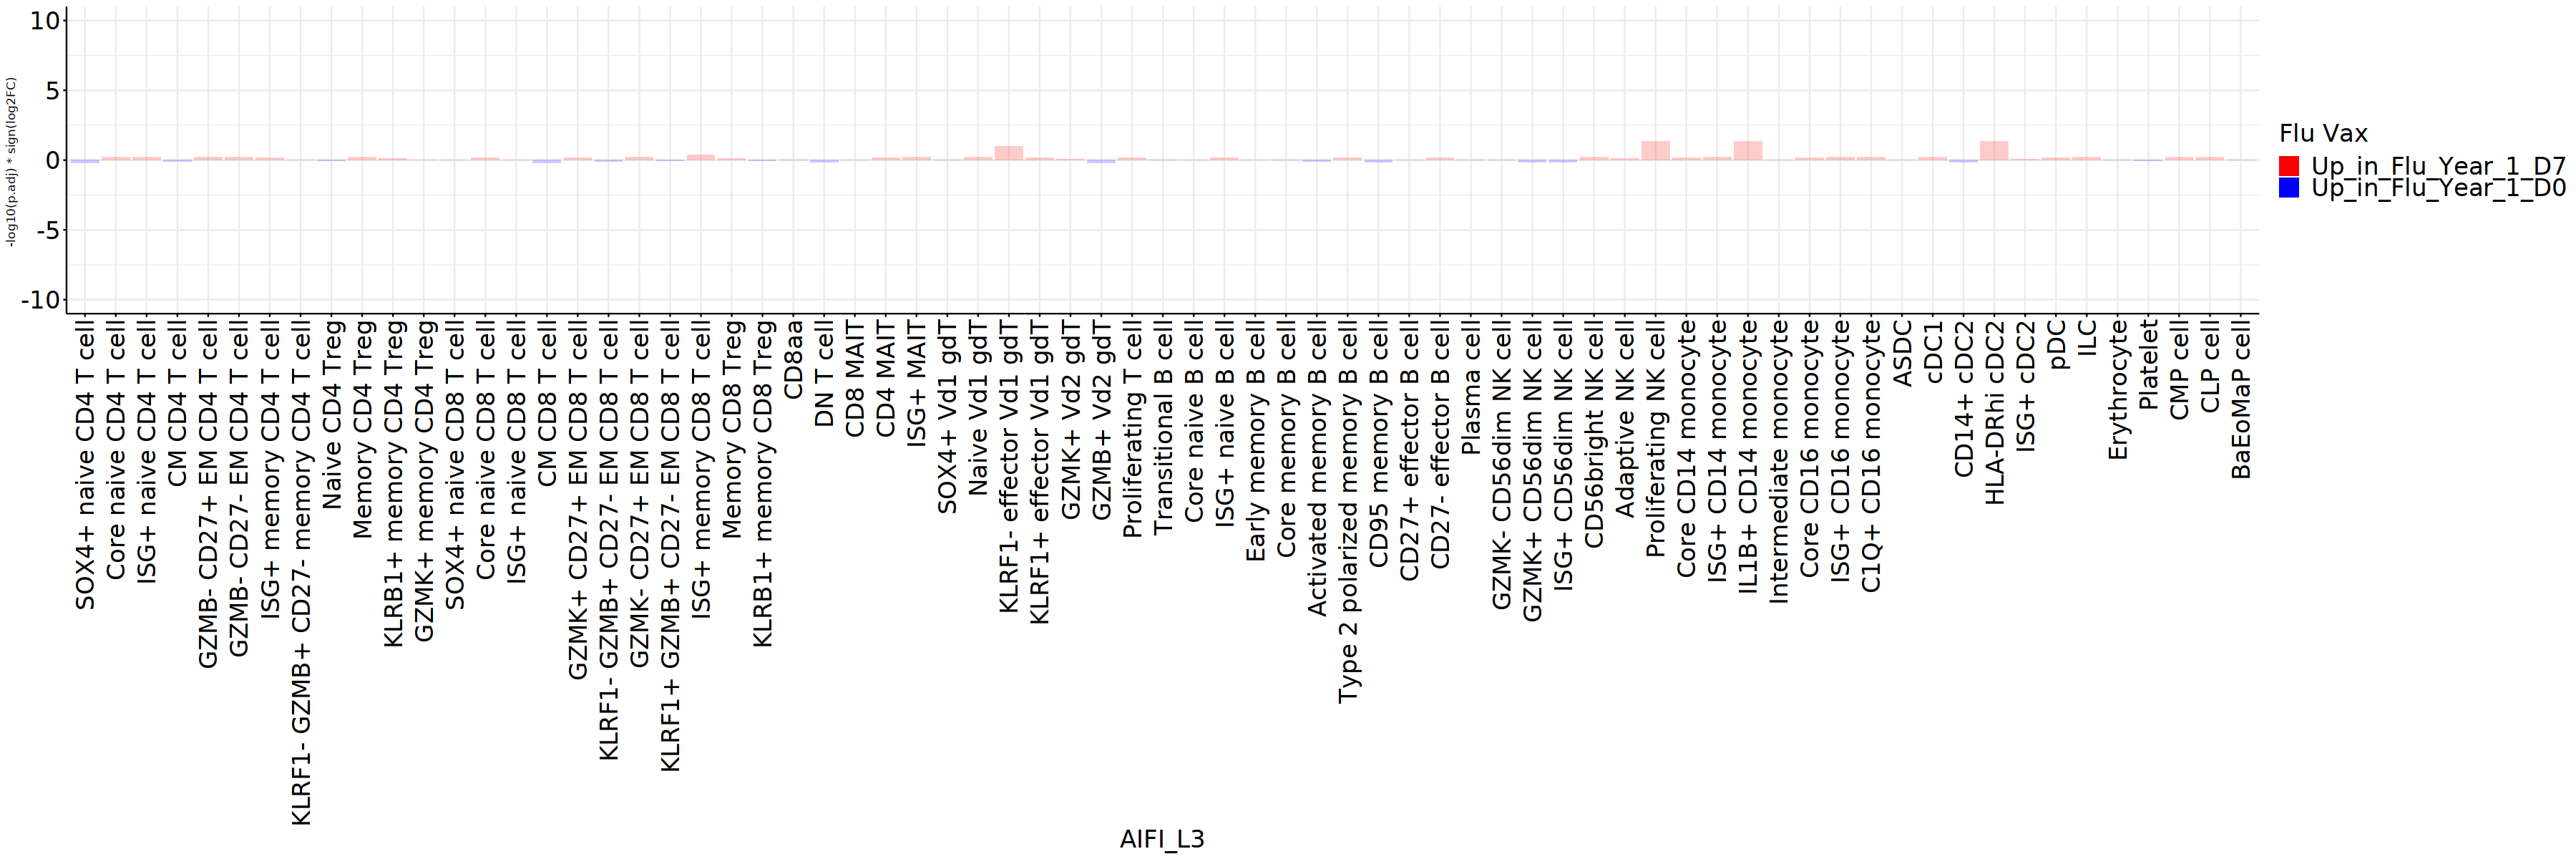

In [160]:
#-log10(p.adj) * sign(log2FC)  - Sex
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(merged_df$product_column >= 0, "Up_in_Flu_Year_1_D0", "Up_in_Flu_Year_1_D7")

options(repr.plot.width = 30, repr.plot.height = 10)
p <- ggplot(merged_df, aes(x = AIFI_L3, y = -product_column, fill = color_legend)) +
  geom_bar(stat = "identity", alpha = ifelse(merged_df$p.adj > 0.05, 0.2, 1)) +
  labs(
      #title = "Bar Plot of -log10(p.adj) * sign(log2FC) - Flu comparison",
       x = "AIFI_L3",
       y = "-log10(p.adj) * sign(log2FC) ") +
  scale_fill_manual(values = c( "Up_in_Flu_Year_1_D7" = "red", "Up_in_Flu_Year_1_D0" = "blue"),
                    breaks = c("Up_in_Flu_Year_1_D7", "Up_in_Flu_Year_1_D0"),
                    labels = c("Up_in_Flu_Year_1_D7", "Up_in_Flu_Year_1_D0")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15, color= "black"),
                axis.text.x = element_text(color = "black",
                                           size = 20,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 20),
                axis.title.x = element_text(size = 20),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 10),
                legend.title = element_text(size = 20),
                legend.text = element_text(size = 20),
                axis.line = element_line(color = "black", size = 0.5),
                axis.ticks = element_line(color = "black"),
                axis.text = element_text(size = 12),)
               #legend.position = "none")


# Add p-values to the plot using geom_text

p + 
#geom_text(aes(label = p.adj.signif), vjust = ifelse(merged_df$log2FC >= 0, 0, 1.5), size = 4)+
    coord_cartesian(ylim = c(-10, 10)) + labs(fill= "Flu Vax") 


## Null Vax

In [77]:
# Read the CSV file into a data frame (No UP1)
null_df <- read.csv('/home/jupyter/Myeloid_cells/files/Null_Vax_DovsD7_raw.csv')


In [146]:
nrow(null_df)

[1] 1939058

In [79]:
rownames(null_df)<-null_df$cell_uuid

In [147]:
## Percentage of total

result <- null_df %>%
  dplyr::group_by(AIFI_L3, subject.subjectGuid, sample.visitName ) %>%               
  dplyr::summarise(count = n()) %>%                  # Count occurrences
  dplyr::group_by(subject.subjectGuid) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(subject.subjectGuid) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% # Group again by subjectGuid for CLR# Calculate percentage
  dplyr::ungroup()

#head(result)
#sum(result$subject.subjectGuid)

`summarise()` has grouped output by 'AIFI_L3', 'subject.subjectGuid'. You can
override using the `.groups` argument.


In [148]:
result %>% filter(subject.subjectGuid == "BR1001") %>% 
      select(percentage) %>%
      pull() %>% 
      sum()

[1] 0

In [149]:
result<-left_join(result,unique(null_df[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex', 'CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))

In [150]:
result$AIFI_L3 <- gsub("Core naive CD8 T cell ", "Core naive CD8 T cell", result$AIFI_L3 )

In [151]:
filtered_data <- result %>%
  group_by(AIFI_L3,subject.subjectGuid) %>%
  filter(all(c("Immune Variation Day 0", "Immune Variation Day 7") %in% sample.visitName))
head(filtered_data)

AIFI_L3,subject.subjectGuid,sample.visitName,count,percentage,percentage_clr,cohort.cohortGuid,subject.biologicalSex,CMV.IgG.Serology.Result.Interpretation
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASDC,BR1002,Immune Variation Day 0,3,0.010250103,-2.448759,BR1,Male,Negative
ASDC,BR1002,Immune Variation Day 7,3,0.010250103,-2.448759,BR1,Male,Negative
ASDC,BR1003,Immune Variation Day 0,4,0.010833649,-2.542572,BR1,Female,Negative
ASDC,BR1003,Immune Variation Day 7,4,0.010833649,-2.542572,BR1,Female,Negative
ASDC,BR1004,Immune Variation Day 0,5,0.012999844,-2.190476,BR1,Male,Negative
ASDC,BR1004,Immune Variation Day 7,1,0.002599969,-3.799914,BR1,Male,Negative


In [152]:
## testing label organization
# Read the CSV file containing the desired labels
label_data <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks/Mansi_Notebooks/scRNA/Frequency_Plot/Immune_Cell_Order_forDEGsummary - Sheet1.csv", header = TRUE)

# Extract the labels from the CSV file
desired_labels <- label_data$FINAL.ORDER


In [ ]:
# testing_df %>%
#   group_by(AIFI_L3, sample.visitName) %>%
#   dplyr::summarize(n = n())

### Median

In [ ]:
filtered_data

In [153]:
#continuous code
#
result_df <- filtered_data %>%
  dplyr::group_by(AIFI_L3, sample.visitName) %>%
  dplyr::summarise(mean_percentage = mean(percentage),
                    median_percentage = median(percentage))

result_df_median<- result_df[, c("AIFI_L3", "sample.visitName", "median_percentage")]


result_df_median <- result_df_median %>% spread(sample.visitName, median_percentage)

result_df_median <- result_df_median %>%  
          mutate(Median_Diff = (`Immune Variation Day 0` - `Immune Variation Day 7`)) %>%
          mutate(log2FC = log2(`Immune Variation Day 0` / `Immune Variation Day 7`))

stat_test<- filtered_data %>%
  select(percentage,percentage_clr, AIFI_L3, sample.visitName) %>%
  unique(.) %>%
  group_by(AIFI_L3) %>%
  wilcox_test(percentage_clr ~ sample.visitName, paired= TRUE) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()

significant_cell_types <- stat_test %>%
  filter(p.adj < 0.05) %>%
  select(AIFI_L3, .y., p, p.adj, p.adj.signif) %>%
  unique()

print(significant_cell_types)

merged_df <- merge(result_df_median, stat_test, by = "AIFI_L3")

merged_df <- merged_df %>% mutate(minus_log10_p_adj = -log(p.adj),
                                  sign_log2FC = sign(log2FC),
                                 product_column = (minus_log10_p_adj * sign_log2FC))

merged_df$AIFI_L3 <- factor(merged_df$AIFI_L3, levels = desired_labels)

`summarise()` has grouped output by 'AIFI_L3'. You can override using the
`.groups` argument.
Adding missing grouping variables: `subject.subjectGuid`


# A tibble: 0 × 5
# ℹ 5 variables: AIFI_L3 <chr>, .y. <chr>, p <dbl>, p.adj <dbl>,
#   p.adj.signif <chr>


In [ ]:
# Extract the 'AIFI_L3' column from both data frames
AIFI_L3_merged_df_v2 <- merged_df_v2$AIFI_L3
AIFI_L3_merged_df <- merged_df$AIFI_L3

# Find matching and non-matching values
matching_values <- intersect(AIFI_L3_merged_df_v2, AIFI_L3_merged_df)
non_matching_values_merged_df_v2 <- setdiff(AIFI_L3_merged_df_v2, AIFI_L3_merged_df)
non_matching_values_merged_df <- setdiff(AIFI_L3_merged_df, AIFI_L3_merged_df_v2)

# Print matching and non-matching values
cat("Matching values:\n", matching_values, "\n\n")
cat("Non-matching values in merged_df_v2:\n", non_matching_values_merged_df_v2, "\n\n")
cat("Non-matching values in merged_df:\n", non_matching_values_merged_df, "\n\n")

# AIFI_L3_merged_df_v2
# AIFI_L3_merged_df
# result_df_median$AIFI_L3

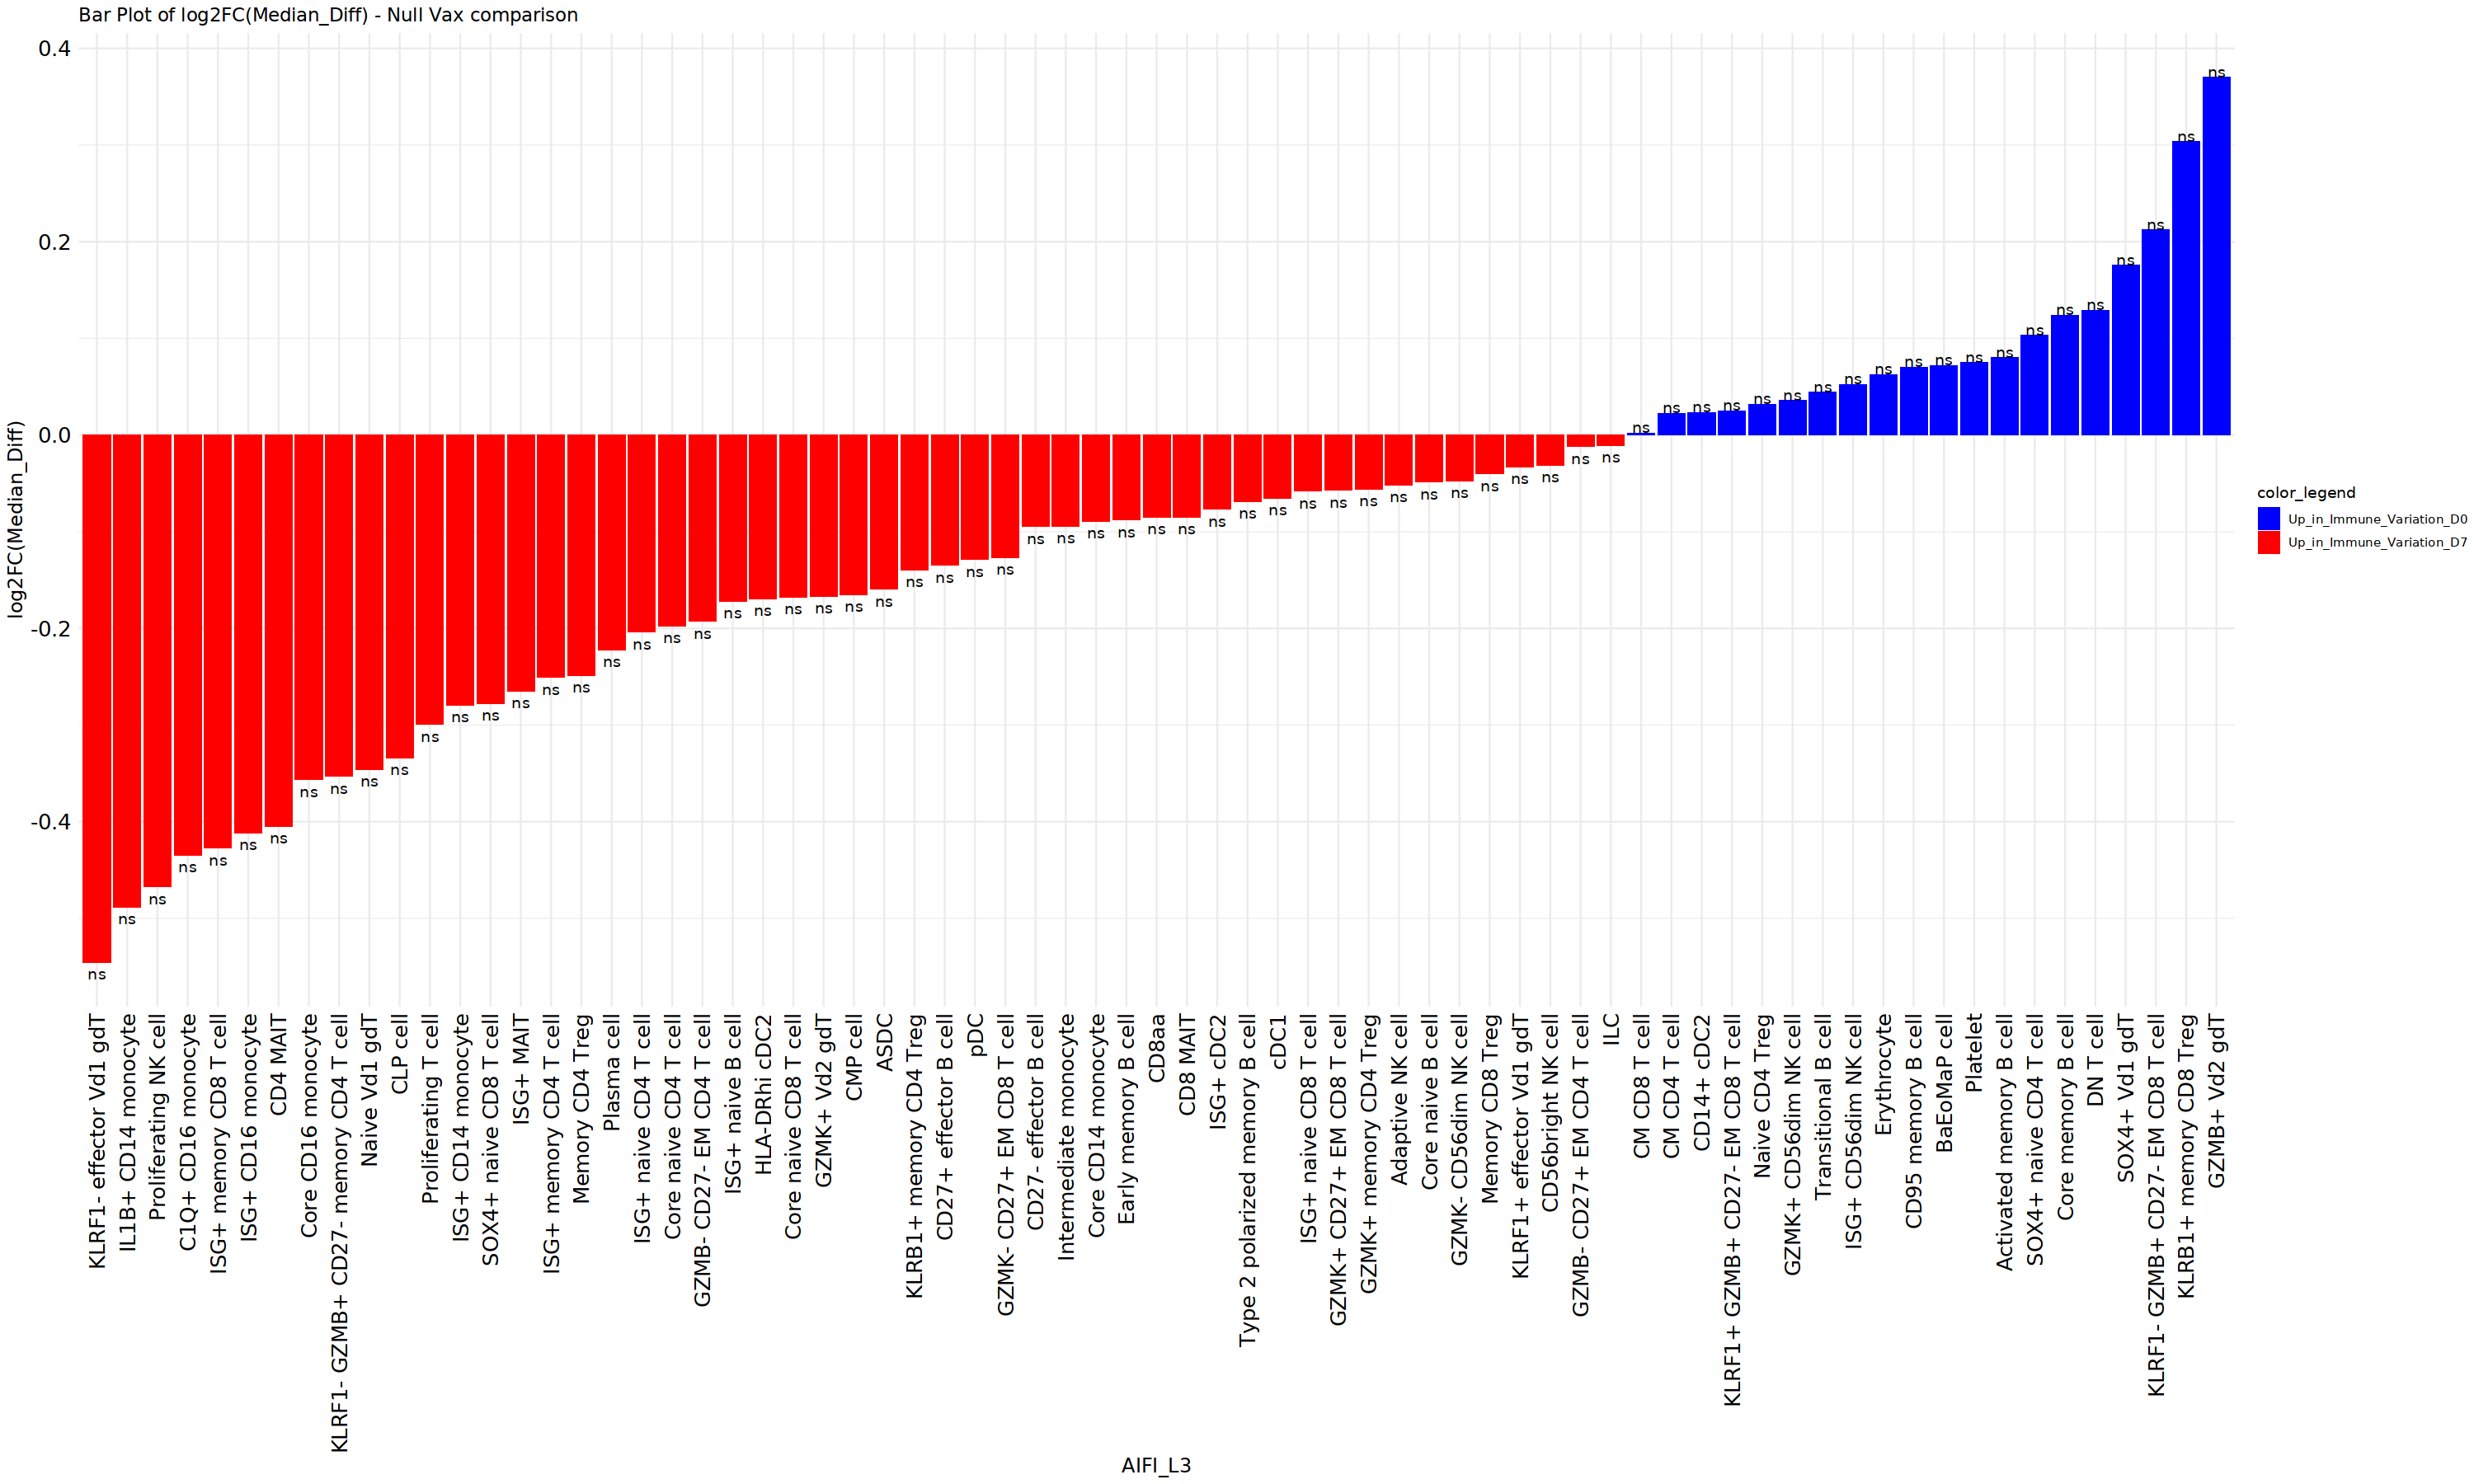

In [88]:
#log2FC(Median_Diff) -
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(result_df_median$log2FC >= 0, "Up_in_Immune_Variation_D0", "Up_in_Immune_Variation_D7")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = reorder(AIFI_L3, desc(-log2FC)), y = log2FC, fill = color_legend)) +
  geom_bar(stat = "identity") +
  labs(title = "Bar Plot of log2FC(Median_Diff) - Null Vax comparison",
       x = "AIFI_L3",
       y = "log2FC(Median_Diff)") +
  scale_fill_manual(values = c("Up_in_Immune_Variation_D0" = "blue", "Up_in_Immune_Variation_D7" = "red"),
                    breaks = c("Up_in_Immune_Variation_D0", "Up_in_Immune_Variation_D7"),
                    labels = c("Up_in_Immune_Variation_D0", "Up_in_Immune_Variation_D7")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15),
                axis.title.x = element_text(size = 14),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 14))


# Add p-values to the plot using geom_text
p + geom_text(aes(label = p.adj.signif), 
              vjust = ifelse(merged_df$log2FC >= 0, 0, 1.5), 
              size = 4)


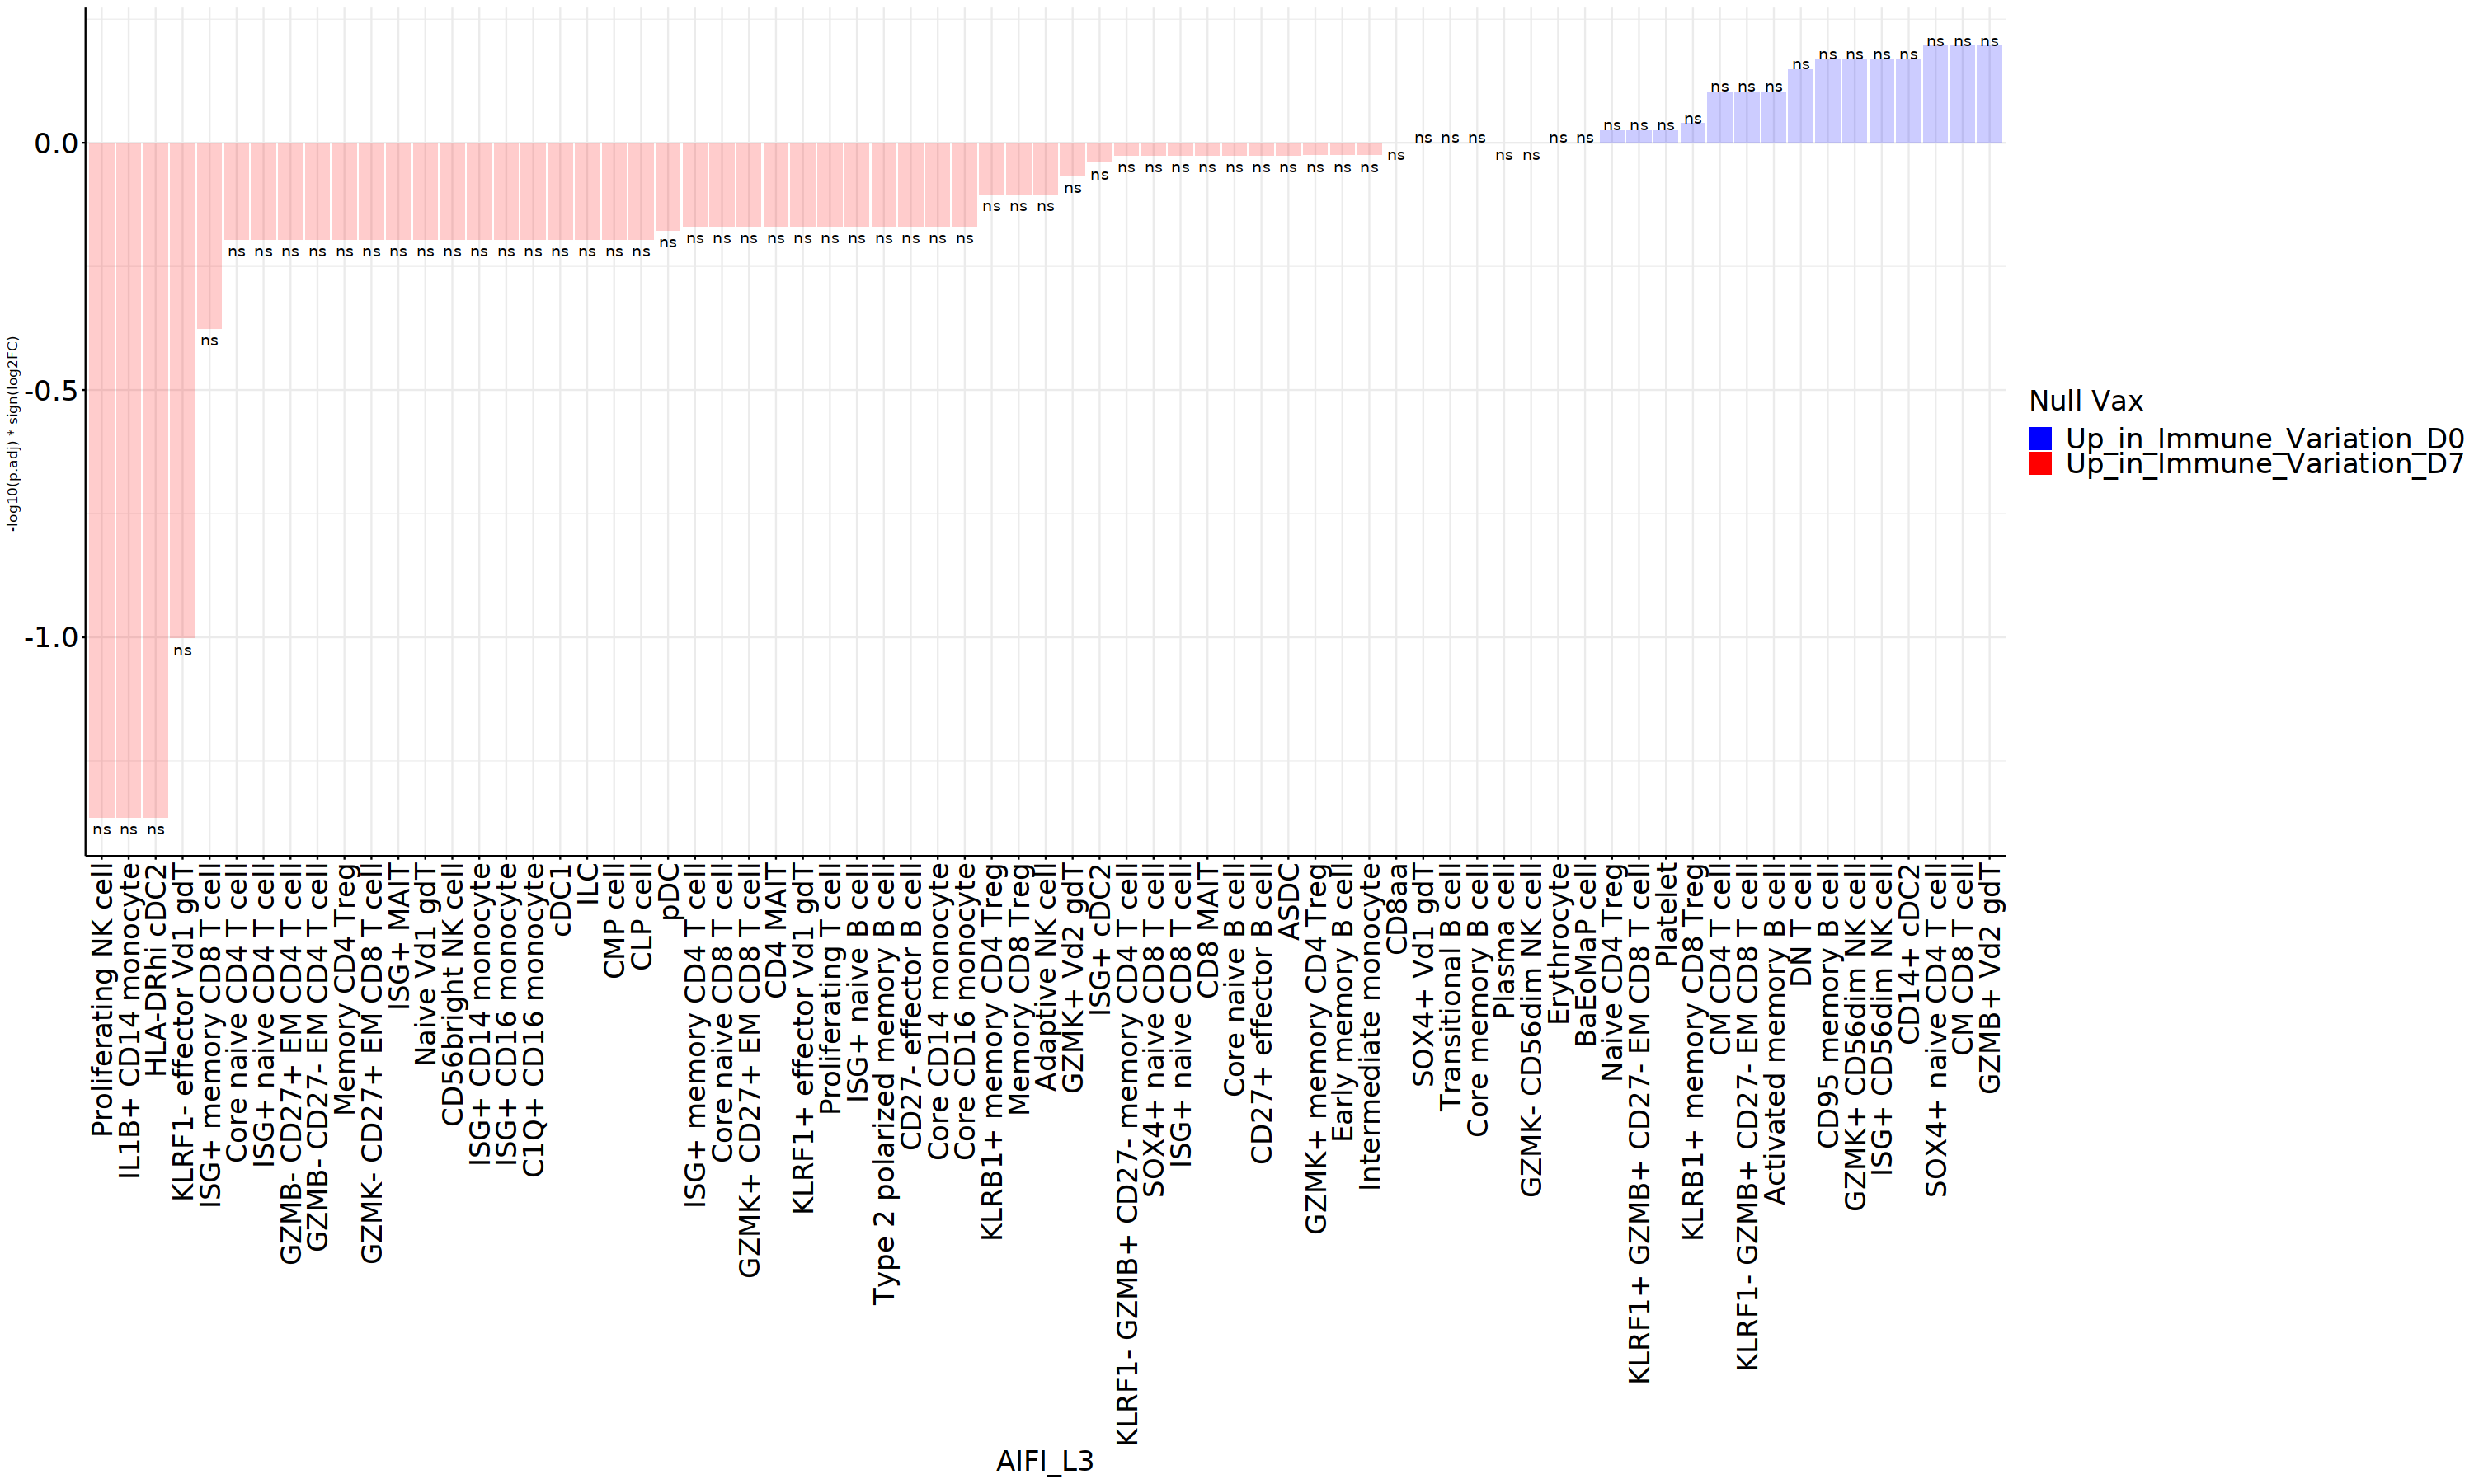

In [92]:
#-log10(p.adj) * sign(log2FC)  - null
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(merged_df$product_column >= 0, "Up_in_Immune_Variation_D0", "Up_in_Immune_Variation_D7")

options(repr.plot.width = 25, repr.plot.height = 15)
p <- ggplot(merged_df, aes(x = reorder(AIFI_L3, desc(-product_column)), y = product_column, fill = color_legend)) +
  geom_bar(stat = "identity", alpha = ifelse(merged_df$p.adj > 0.05, 0.2, 1)) +
  labs(
      #title = "Bar Plot of -log10(p.adj) * sign(log2FC) - Null Vax comparison",
       x = "AIFI_L3",
       y = "-log10(p.adj) * sign(log2FC) ") +
  scale_fill_manual(values = c("Up_in_Immune_Variation_D0" = "blue", "Up_in_Immune_Variation_D7" = "red"),
                    breaks = c("Up_in_Immune_Variation_D0", "Up_in_Immune_Variation_D7"),
                    labels = c("Up_in_Immune_Variation_D0", "Up_in_Immune_Variation_D7")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15, color= "black"),
                axis.text.x = element_text(color = "black",
                                           size = 20,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 20),
                axis.title.x = element_text(size = 20),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 10),
                legend.title = element_text(size = 20),
                legend.text = element_text(size = 20),
                axis.line = element_line(color = "black", size = 0.5),
                axis.ticks = element_line(color = "black"),
                axis.text = element_text(size = 12))


# Add p-values to the plot using geom_text

p + geom_text(aes(label = p.adj.signif), vjust = ifelse(merged_df$log2FC >= 0, 0, 1.5), size = 4) + labs(fill= "Null Vax") 


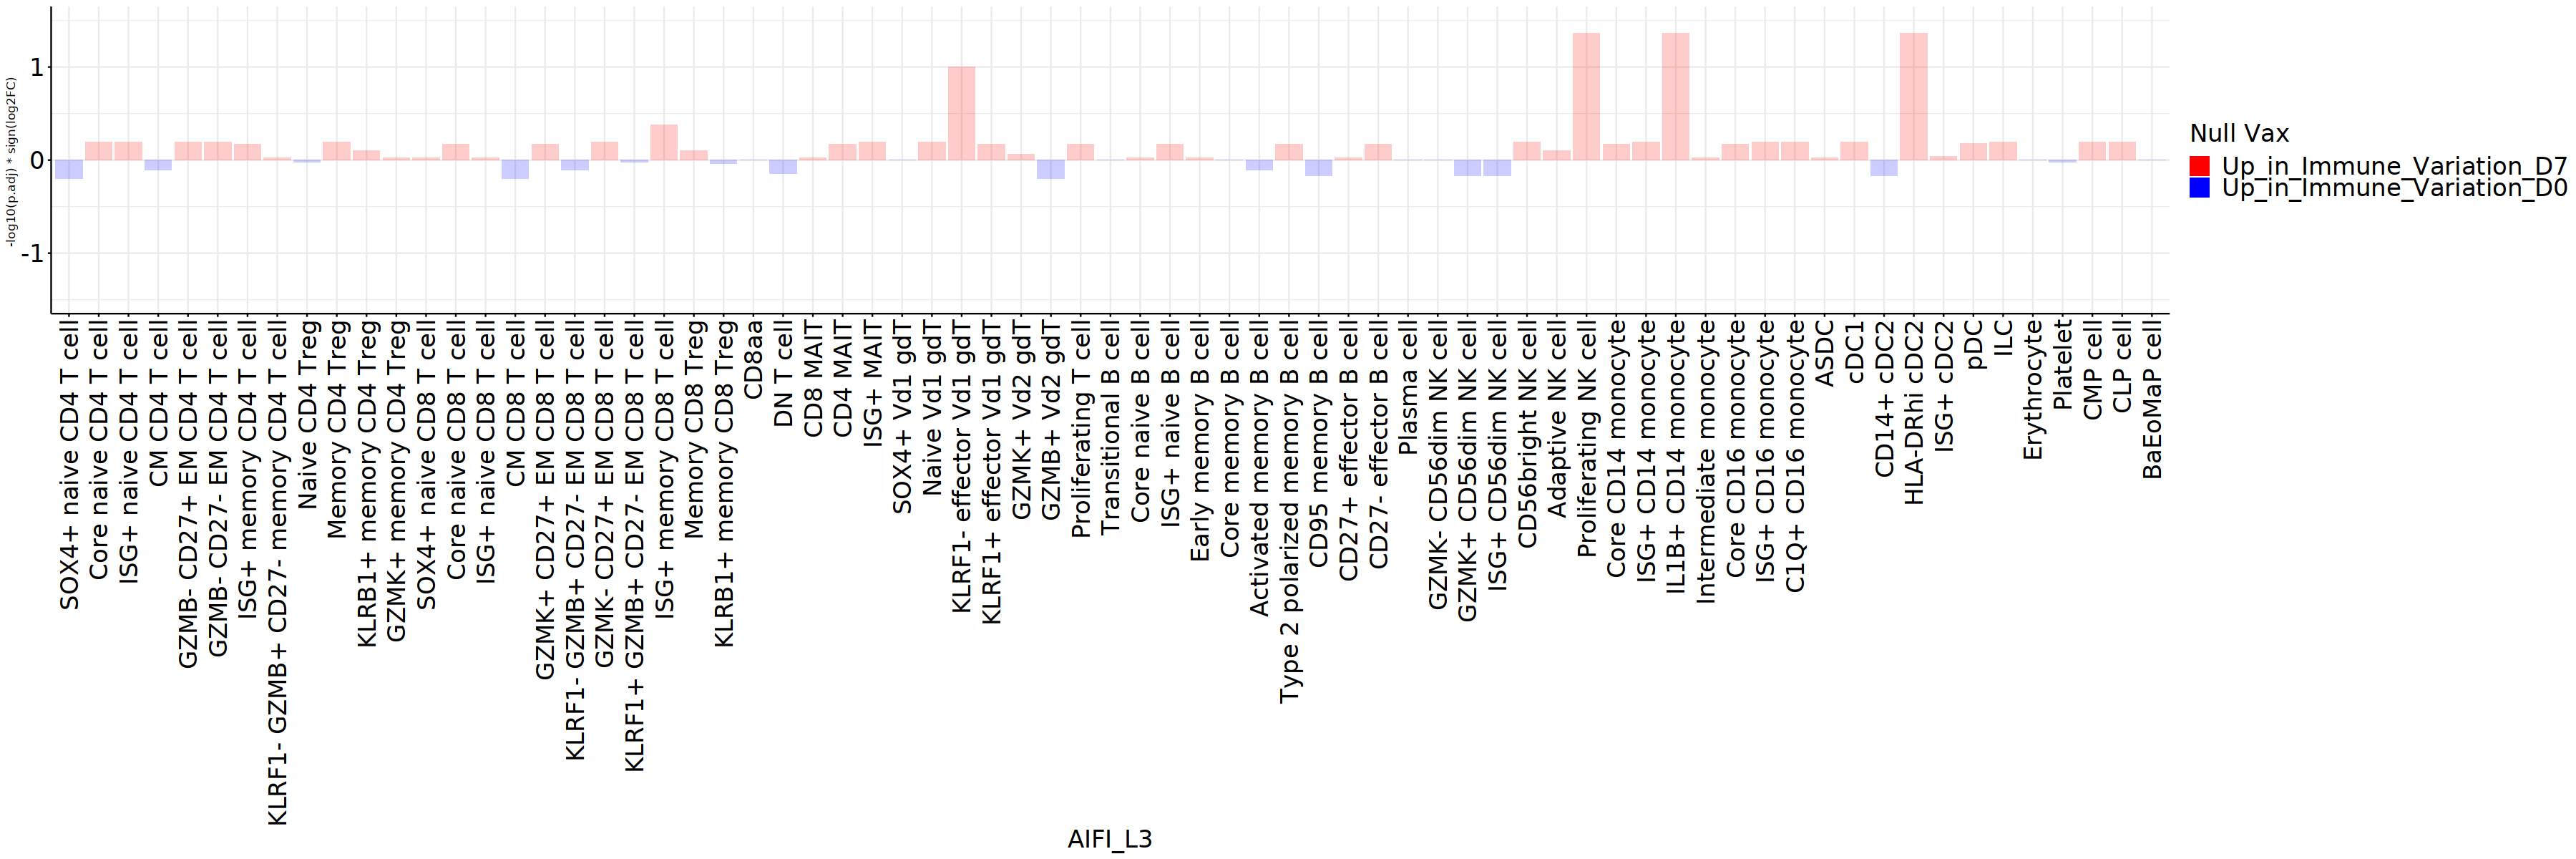

In [158]:
#-log10(p.adj) * sign(log2FC)  - null
library(ggplot2)

# Create a new column for color based on Mean_Diff
merged_df$color_legend <- ifelse(merged_df$product_column >= 0, "Up_in_Immune_Variation_D0", "Up_in_Immune_Variation_D7")

options(repr.plot.width = 30, repr.plot.height = 10)
p <- ggplot(merged_df, aes(x = AIFI_L3, y = -product_column, fill = color_legend)) +
  geom_bar(stat = "identity", alpha = ifelse(merged_df$p.adj > 0.05, 0.2, 1)) +
  labs(
      #title = "Bar Plot of -log10(p.adj) * sign(log2FC) - Null Vax comparison",
       x = "AIFI_L3",
       y = "-log10(p.adj) * sign(log2FC) ") +
  scale_fill_manual(values = c("Up_in_Immune_Variation_D7" = "red", "Up_in_Immune_Variation_D0" = "blue"),
                    breaks = c("Up_in_Immune_Variation_D7", "Up_in_Immune_Variation_D0"),
                    labels = c("Up_in_Immune_Variation_D7", "Up_in_Immune_Variation_D0")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  #coord_flip()+
  theme_minimal() +
  theme(strip.text = element_text(size = 15, color= "black"),
                axis.text.x = element_text(color = "black",
                                           size = 20,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 20),
                axis.title.x = element_text(size = 20),  # Adjust the font size of x-axis title
                axis.title.y = element_text(size = 10),
                legend.title = element_text(size = 20),
                legend.text = element_text(size = 20),
                axis.line = element_line(color = "black", size = 0.5),
                axis.ticks = element_line(color = "black"),
                axis.text = element_text(size = 12),)
                #legend.position= "none")


# Add p-values to the plot using geom_text

p + #geom_text(aes(label = p.adj.signif), vjust = ifelse(merged_df$log2FC >= 0, 0, 1.5), size = 4)+
    coord_cartesian(ylim = c(-1.5, 1.5)) + labs(fill= "Null Vax") 


In [ ]:
testing_df$AIFI_L3 <- factor(testing_df$AIFI_L3, levels = desired_labels)
head(testing_df)

In [ ]:
testing_df %>%
  group_by(AIFI_L3, sample.visitName) %>%
  dplyr::summarize(n = n())

In [ ]:
stat_test_2<- testing_df %>%
  select(percentage,percentage_clr, AIFI_L3, sample.visitName, subject.subjectGuid) %>%
  unique(.) %>%
  group_by(AIFI_L3) %>%
  wilcox_test(percentage_clr ~ sample.visitName, paired= TRUE) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance() %>% add_xy_position(x= "AIFI_L3", fun = "max", comparisons = list(c("Flu Year 1 Day 0", "Flu Year 1 Day 7"))) 

In [ ]:
stat_test<- filtered_data %>%
  select(percentage,percentage_clr, AIFI_L3, sample.visitName) %>%
  unique(.) %>%
  group_by(AIFI_L3) %>%
  wilcox_test(percentage_clr ~ sample.visitName, paired= TRUE) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()

# Calculating the log2FC of Percentage - Rough

In [ ]:
## Percentage of total

result <- myeloid_df %>%
  dplyr::group_by(AIFI_L3, subject.subjectGuid ) %>%               
  dplyr::summarise(count = n()) %>%                  # Count occurrences
  dplyr::group_by(subject.subjectGuid) %>%                       
  dplyr::mutate(percentage = (count / sum(count)) * 100) %>% 
  dplyr::group_by(subject.subjectGuid) %>%     
  dplyr::mutate(percentage_clr = clr_transform((percentage))) %>% # Group again by subjectGuid for CLR# Calculate percentage
  dplyr::ungroup()

head(result)
#sum(result$subject.subjectGuid)

In [ ]:
result %>% filter(subject.subjectGuid == "BR1001") %>% 
      select(percentage) %>%
      pull() %>% 
      sum()

In [ ]:
result<-left_join(result,unique(myeloid_df[c('cohort.cohortGuid','subject.subjectGuid','subject.biologicalSex','CMV.IgG.Serology.Result.Interpretation')]),by=c('subject.subjectGuid'))

In [ ]:
head(result)

In [ ]:
# library(dplyr)

# # Assuming your data frame is named 'your_data'
# result_df <- result %>%
#   dplyr::group_by(AIFI_L3, cohort.cohortGuid, CMV.IgG.Serology.Result.Interpretation) %>%
#   dplyr::summarise(mean_percentage = mean(percentage)) %>%
#   tidyr::pivot_wider(names_from = CMV.IgG.Serology.Result.Interpretation, values_from = mean_percentage) %>%
#   dplyr::mutate(Mean_Diff_BR1 = Positive - Negative,
#          Mean_Diff_BR2 = Positive - Negative) %>%
#   dplyr::select(AIFI_L3, cohort.cohortGuid, Mean_Diff_BR1, Mean_Diff_BR2)

# # Print the result
# print(result_df)


In [ ]:
library(dplyr)
library(tidyr)

# Assuming your data frame is named 'your_data'
result_log <- result %>%
  dplyr::group_by(AIFI_L3, CMV.IgG.Serology.Result.Interpretation, cohort.cohortGuid) %>%
  dplyr::summarise(mean_percentage = mean(percentage)) 

# Print the result
print(result_log)

In [ ]:
result_log <- result_log %>% spread(CMV.IgG.Serology.Result.Interpretation, mean_percentage)

In [ ]:
head(result_log)

In [ ]:
result_log <- result_log %>%  mutate(log2FC = abs(log2((Positive)/(Negative))))

In [ ]:
head(result_log)

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 16)
result_log$log2FC_v2 <- ifelse(result_log$cohort.cohortGuid == "BR1", -1 * result_log$log2FC, result_log$log2FC)

library(ggplot2)
ggplot(data = result_log) + geom_bar(aes(x = reorder(AIFI_L3, desc(-log2FC)), y = log2FC_v2, fill = cohort.cohortGuid), stat = "identity", position = "identity") +
                        #geom_text(aes(x=AIFI_L3,y=Mean_Diff2,label=abs(Mean_Diff2)),vjust = ifelse(result_df$Mean_Diff2 >= 0, 0, 1)) +
                        coord_flip()+
                        scale_y_continuous(labels=abs)+
                        theme(strip.text = element_text(size = 15),
                axis.text.x = element_text(color = "black",
                                           size = 15,
                                           angle = 90,
                                           hjust = 1,
                                           vjust = 0.5),
                axis.text.y = element_text(color = "black", size = 15))+
                xlab("AIFI_L3") +
                ylab("Log2FC")

# Calculating the log2FC and mean difference - rough work

In [ ]:
stat_test<- result %>%
  select(percentage, AIFI_L3, cohort.cohortGuid, CMV.IgG.Serology.Result.Interpretation) %>%
  unique(.) %>%
  group_by(AIFI_L3, CMV.IgG.Serology.Result.Interpretation) %>%
  wilcox_test(percentage ~ cohort.cohortGuid) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()

In [ ]:
head(stat_test)

In [ ]:
stat_test$log2FC <- log2(result$percentage[result$cohort.cohortGuid == "BR1"] / result$percentage[result$cohort.cohortGuid == "BR2"])

In [ ]:
#New column for log2FC
result$log2FC <- NA

# Calculate log2FC only for rows where the cohort is either "BR1" or "BR2"
subset_rows <- result$cohort.cohortGuid %in% c("BR1", "BR2")

# Calculate log2FC for the valid rows
result$log2FC[subset_rows] <- log2(result$percentage[subset_rows & result$cohort.cohortGuid == "BR1"] / 
                                           result$percentage[subset_rows & result$cohort.cohortGuid == "BR2"])


In [ ]:
head(result)

In [ ]:
result_cohort$log2FC <- 


In [ ]:
# Percentage comparing Age across CMV

#result_cohort <- result[result$CMV.IgG.Serology.Result.Interpretation == 'Negative', ]
result_cohort <- result[result$CMV.IgG.Serology.Result.Interpretation == 'Positive', ]

stat_test<- result_cohort %>%
  select(percentage, AIFI_L3, cohort.cohortGuid, CMV.IgG.Serology.Result.Interpretation) %>%
  unique(.) %>%
  group_by(AIFI_L3, CMV.IgG.Serology.Result.Interpretation) %>%
  wilcox_test(percentage ~ cohort.cohortGuid) %>%
  adjust_pvalue(method = "BH") %>%
  add_significance()


# Create the plot
options(repr.plot.width = 35, repr.plot.height = 12)
p4 <- ggplot(result_cohort, aes(x = reorder(AIFI_L3, desc(percentage)) , y = percentage, color = cohort.cohortGuid)) +
  geom_boxplot(width = .5, outlier.shape = '.') +
  scale_x_discrete(name ="AIFI_L3", guide = guide_axis(angle = 90)) +
  theme_bw(base_size = 12) +
  geom_pwc(
    aes(group = cohort.cohortGuid),
    tip.length = 0, p.adjust.method = "BH",
    method = "wilcox_test", label ="p= {p.adj} {p.signif}", angle = 90, hide.ns = FALSE  # or "panel"
  ) +
  #facet_grid(cohort.cohortGuid ~ ., scales = "free_y", space = "free_y") +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.15))) +
  theme(axis.text.x = element_text(size = 16, color = "black", angle = 90, hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(size = 16, color = "black"),
        axis.title.x = element_text(size = 16, color = "black"),
        axis.title.y = element_text(size = 16, color = "black"))

# Display the plot
print(p4)


In [ ]:
head(result)

In [ ]:
# Create a bidirectional plot
ggplot(result, aes(x = AIFI_L3, y = log2FC, color = group)) +
  geom_segment(aes(x = -Inf, xend = Inf, yend = y), linetype = "dashed") +
  geom_point() +
  theme_minimal()

In [ ]:
#stat.test
stat.test$AdjP = round(p.adjust(stat.test$p, 'BH'),3)

stat.test %>% head()
tmp = left_join(NK_df, stat.test)
#ggplot(NK_df
head(tmp)

NK_df$PercentageCLR = NK_df$`.y`
ggplot(tmp, aes(x=AIFI_L3,
                y=PercentageCLR,
                fill=CMV.IgG.Serology.Result.Interpretation,
                label=AdjP))+geom_boxplot()+
        geom_text(mapping = aes(x=AIFI_L3,
                                y=max(PercentageCLR)+0.4))